# Import required Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/B.Tech Project/oqmd_data.csv')

In [ ]:
df.head()

name  entry_id  icsd_id      sg            cs  cs1  z_mean      z_std  \
0  CaInBr3    647362    54138    Cmcm  orthorhombic    3    34.8   9.173876   
1  CaTlBr3   1377987        0    Cmcm  orthorhombic    3    41.2  20.730654   
2  CdInBr3     14334    79512    Pnma  orthorhombic    3    40.4   6.621178   
3  CrInBr3    647360    54136   P21/c    monoclinic    5    35.6   7.939773   
4  CsAgBr3   1368552        0  I4/mmm    tetragonal    4    41.4   8.236504   

   grp_mean   grp_std  ...  heat_fus_std  heat_vap_mean  heat_vap_std  \
0      13.2  5.810336  ...      0.017305       0.889717      0.934760   
1      13.2  5.810336  ...      0.014510       0.755037      0.737668   
2      15.2  2.227106  ...      0.011225       0.775757      0.873220   
3      14.0  4.289522  ...      0.064360       1.270965      1.414633   
4      12.6  6.248200  ...      0.030513       0.752965      0.964829   

   spec_heat_mean  spec_heat_std       gtf        of        Es        Ef  \
0         0.74118       0.282079  0.784683  1.064553  0.000151 -1.707352   
1         0.72038       0.320062  0.645522  1.509626  0.000000 -1.794562   
2         0.66098       0.350670  0.765289  1.064553  0.007149 -0.990649   
3         0.70458       0.304946  0.707107  1.064553  0.040698 -0.846143   
4         0.66378       0.347247  0.966619  1.231031  0.000000 -1.126859   

      Eg  
0  3.243  
1  3.857  
2  2.176  
3  0.431  
4  0.000  

[5 rows x 66 columns]

In [ ]:
df.shape

(16323, 66)

In [ ]:
df = df.round(decimals = 2)
df.head()

name  entry_id  icsd_id      sg            cs  cs1  z_mean  z_std  \
0  CaInBr3    647362    54138    Cmcm  orthorhombic    3    34.8   9.17   
1  CaTlBr3   1377987        0    Cmcm  orthorhombic    3    41.2  20.73   
2  CdInBr3     14334    79512    Pnma  orthorhombic    3    40.4   6.62   
3  CrInBr3    647360    54136   P21/c    monoclinic    5    35.6   7.94   
4  CsAgBr3   1368552        0  I4/mmm    tetragonal    4    41.4   8.24   

   grp_mean  grp_std  ...  heat_fus_std  heat_vap_mean  heat_vap_std  \
0      13.2     5.81  ...          0.02           0.89          0.93   
1      13.2     5.81  ...          0.01           0.76          0.74   
2      15.2     2.23  ...          0.01           0.78          0.87   
3      14.0     4.29  ...          0.06           1.27          1.41   
4      12.6     6.25  ...          0.03           0.75          0.96   

   spec_heat_mean  spec_heat_std   gtf    of    Es    Ef    Eg  
0            0.74           0.28  0.78  1.06  0.00 -1.71  3.24  
1            0.72           0.32  0.65  1.51  0.00 -1.79  3.86  
2            0.66           0.35  0.77  1.06  0.01 -0.99  2.18  
3            0.70           0.30  0.71  1.06  0.04 -0.85  0.43  
4            0.66           0.35  0.97  1.23  0.00 -1.13  0.00  

[5 rows x 66 columns]

# Exploration of Data

In [ ]:
df.describe()

entry_id        icsd_id           cs1        z_mean         z_std  \
count  1.632300e+04   16323.000000  16323.000000  16323.000000  16323.000000   
mean   6.215521e+05    8428.196900      2.299884     24.574539     22.424449   
std    3.304396e+05   46148.274399      1.287947      7.132440      8.428234   
min    1.606000e+03       0.000000      1.000000      2.000000      1.170000   
25%    3.530715e+05       0.000000      1.000000     19.800000     16.560000   
50%    6.800570e+05       0.000000      2.000000     24.400000     22.870000   
75%    6.938995e+05       0.000000      3.000000     29.200000     28.950000   
max    1.476165e+06  710042.000000      7.000000     64.400000     41.890000   

           grp_mean       grp_std      row_mean       row_std   pet_mn_mean  \
count  16323.000000  16323.000000  16323.000000  16323.000000  16323.000000   
mean      12.705642      4.575394      3.444820      1.888767     80.179207   
std        1.513760      1.611764      0.525251      0.675102      6.984659   
min        1.200000      0.000000      1.400000      0.000000     59.600000   
25%       11.800000      3.500000      3.000000      1.260000     75.400000   
50%       12.800000      4.940000      3.400000      1.740000     80.000000   
75%       13.600000      5.850000      3.800000      2.400000     85.400000   
max       16.400000      7.840000      5.800000      3.430000    101.200000   

       ...  heat_fus_std  heat_vap_mean  heat_vap_std  spec_heat_mean  \
count  ...  16323.000000   16323.000000  16323.000000    16323.000000   
mean   ...      0.083608       1.256453      1.701063        0.756036   
std    ...      0.053403       0.493273      0.696133        0.666341   
min    ...      0.000000       0.030000      0.010000        0.190000   
25%    ...      0.050000       0.910000      1.230000        0.630000   
50%    ...      0.070000       1.230000      1.610000        0.660000   
75%    ...      0.100000       1.590000      2.210000        0.730000   
max    ...      0.430000       3.200000      3.890000        9.660000   

       spec_heat_std           gtf            of            Es            Ef  \
count   16323.000000  16323.000000  16323.000000  16323.000000  16323.000000   
mean        0.402324      0.810084      0.734311      0.479261     -1.852083   
std         0.600095      0.135010      0.289515      0.556127      0.937053   
min         0.000000      0.460000      0.000000      0.000000     -3.880000   
25%         0.300000      0.720000      0.600000      0.100000     -2.530000   
50%         0.330000      0.800000      0.670000      0.280000     -1.950000   
75%         0.360000      0.870000      0.850000      0.650000     -1.230000   
max         6.870000      2.030000      4.800000      4.730000      2.360000   

                 Eg  
count  16323.000000  
mean       0.666944  
std        1.298729  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.760000  
max        7.940000  

[8 rows x 63 columns]

In [ ]:
df.keys()

Index(['name', 'entry_id', 'icsd_id', 'sg', 'cs', 'cs1', 'z_mean', 'z_std',
       'grp_mean', 'grp_std', 'row_mean', 'row_std', 'pet_mn_mean',
       'pet_mn_std', 'mn_mean', 'mn_std', 'iupac_mean', 'iupac_std',
       'av_ionrad_mean', 'av_ionrad_std', 'atom_rad_mean', 'atom_rad_std',
       'cal_atom_rad_mean', 'cal_atom_rad_std', 'cov_rad_mean', 'cov_rad_std',
       'vdw_mean', 'vdw_std', 'x_mean', 'x_std', 'val_mean', 'val_std',
       'ea_mean', 'ea_std', 'ie_mean', 'ie_std', 'p_mean', 'p_std', 'rsp_mean',
       'rsp_std', 'av_rsp_mean', 'av_rsp_std', 'atom_mass_mean',
       'atom_mass_std', 'mol_vol_mean', 'mol_vol_std', 'vol', 'bp_mean',
       'bp_std', 'rho_mean', 'rho_std', 'mp_mean', 'mp_std', 'k_mean', 'k_std',
       'heat_fus_mean', 'heat_fus_std', 'heat_vap_mean', 'heat_vap_std',
       'spec_heat_mean', 'spec_heat_std', 'gtf', 'of', 'Es', 'Ef', 'Eg'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16323 entries, 0 to 16322
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16323 non-null  object 
 1   entry_id           16323 non-null  int64  
 2   icsd_id            16323 non-null  int64  
 3   sg                 16323 non-null  object 
 4   cs                 16323 non-null  object 
 5   cs1                16323 non-null  int64  
 6   z_mean             16323 non-null  float64
 7   z_std              16323 non-null  float64
 8   grp_mean           16323 non-null  float64
 9   grp_std            16323 non-null  float64
 10  row_mean           16323 non-null  float64
 11  row_std            16323 non-null  float64
 12  pet_mn_mean        16323 non-null  float64
 13  pet_mn_std         16323 non-null  float64
 14  mn_mean            16323 non-null  float64
 15  mn_std             16323 non-null  float64
 16  iupac_mean         163

In [ ]:
df.isnull().sum()

name        0
entry_id    0
icsd_id     0
sg          0
cs          0
           ..
gtf         0
of          0
Es          0
Ef          0
Eg          0
Length: 66, dtype: int64

This shows that there is no missing value in my data, so no need to do any Missing data imputation.

In [ ]:
# Univariate Analysis of cs column
df['cs'].value_counts()

cs
cubic           5544
trigonal        4691
orthorhombic    3089
tetragonal      2089
monoclinic       603
hexagonal        172
triclinic        135
Name: count, dtype: int64

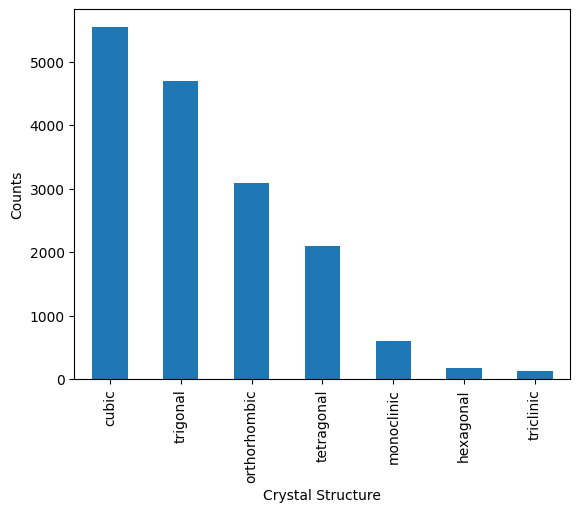

In [ ]:
df['cs'].value_counts().plot(kind='bar')
plt.xlabel('Crystal Structure')
plt.ylabel('Counts')

# Show the plot
plt.show()

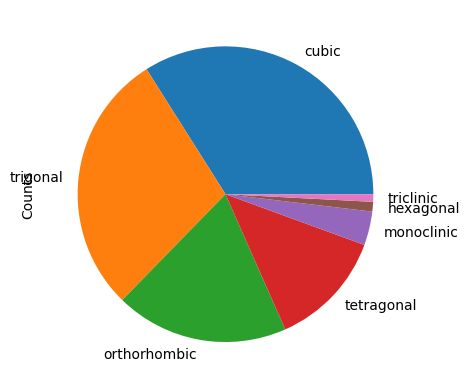

In [ ]:
df['cs'].value_counts().plot(kind='pie')
plt.ylabel('Counts')
# Show the plot
plt.show()

# Define numerical and categorical columns

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 63 numerical features : ['entry_id', 'icsd_id', 'cs1', 'z_mean', 'z_std', 'grp_mean', 'grp_std', 'row_mean', 'row_std', 'pet_mn_mean', 'pet_mn_std', 'mn_mean', 'mn_std', 'iupac_mean', 'iupac_std', 'av_ionrad_mean', 'av_ionrad_std', 'atom_rad_mean', 'atom_rad_std', 'cal_atom_rad_mean', 'cal_atom_rad_std', 'cov_rad_mean', 'cov_rad_std', 'vdw_mean', 'vdw_std', 'x_mean', 'x_std', 'val_mean', 'val_std', 'ea_mean', 'ea_std', 'ie_mean', 'ie_std', 'p_mean', 'p_std', 'rsp_mean', 'rsp_std', 'av_rsp_mean', 'av_rsp_std', 'atom_mass_mean', 'atom_mass_std', 'mol_vol_mean', 'mol_vol_std', 'vol', 'bp_mean', 'bp_std', 'rho_mean', 'rho_std', 'mp_mean', 'mp_std', 'k_mean', 'k_std', 'heat_fus_mean', 'heat_fus_std', 'heat_vap_mean', 'heat_vap_std', 'spec_heat_mean', 'spec_heat_std', 'gtf', 'of', 'Es', 'Ef', 'Eg']

We have 3 categorical features : ['name', 'sg', 'cs']


In [ ]:
df= df.drop(columns=["name","entry_id","icsd_id","sg","cs"], errors='ignore')
df.sample()

cs1  z_mean  z_std  grp_mean  grp_std  row_mean  row_std  pet_mn_mean  \
455    4    22.2  18.14      12.6     6.25       3.2      1.6         77.2   

     pet_mn_std  mn_mean  ...  heat_fus_std  heat_vap_mean  heat_vap_std  \
455        36.5     69.6  ...          0.05           0.77          1.19   

     spec_heat_mean  spec_heat_std   gtf    of   Es    Ef   Eg  
455            0.62           0.25  1.17  1.16  0.0 -2.27  0.0  

[1 rows x 61 columns]

In [ ]:
feature_names=df.keys()
feature_names

Index(['cs1', 'z_mean', 'z_std', 'grp_mean', 'grp_std', 'row_mean', 'row_std',
       'pet_mn_mean', 'pet_mn_std', 'mn_mean', 'mn_std', 'iupac_mean',
       'iupac_std', 'av_ionrad_mean', 'av_ionrad_std', 'atom_rad_mean',
       'atom_rad_std', 'cal_atom_rad_mean', 'cal_atom_rad_std', 'cov_rad_mean',
       'cov_rad_std', 'vdw_mean', 'vdw_std', 'x_mean', 'x_std', 'val_mean',
       'val_std', 'ea_mean', 'ea_std', 'ie_mean', 'ie_std', 'p_mean', 'p_std',
       'rsp_mean', 'rsp_std', 'av_rsp_mean', 'av_rsp_std', 'atom_mass_mean',
       'atom_mass_std', 'mol_vol_mean', 'mol_vol_std', 'vol', 'bp_mean',
       'bp_std', 'rho_mean', 'rho_std', 'mp_mean', 'mp_std', 'k_mean', 'k_std',
       'heat_fus_mean', 'heat_fus_std', 'heat_vap_mean', 'heat_vap_std',
       'spec_heat_mean', 'spec_heat_std', 'gtf', 'of', 'Es', 'Ef', 'Eg'],
      dtype='object')

# Outlier Removal

In [ ]:
from scipy import stats

In [ ]:
#  Remove Outliers using IQR method
def remove_outliers(df):
    df_no_outliers = df.copy()
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_no_outliers = df_no_outliers[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers

# Apply outlier removal
df_cleaned = remove_outliers(df)

<ipython-input-17-ca82ebae5344>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
<ipython-input-17-ca82ebae5344>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
<ipython-input-17-ca82ebae5344>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
<ipython-input-17-ca82ebae5344>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
<ipython-input-17-ca82ebae5344>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df_no_outliers[(df[column] >= lower_bound) & (df[

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

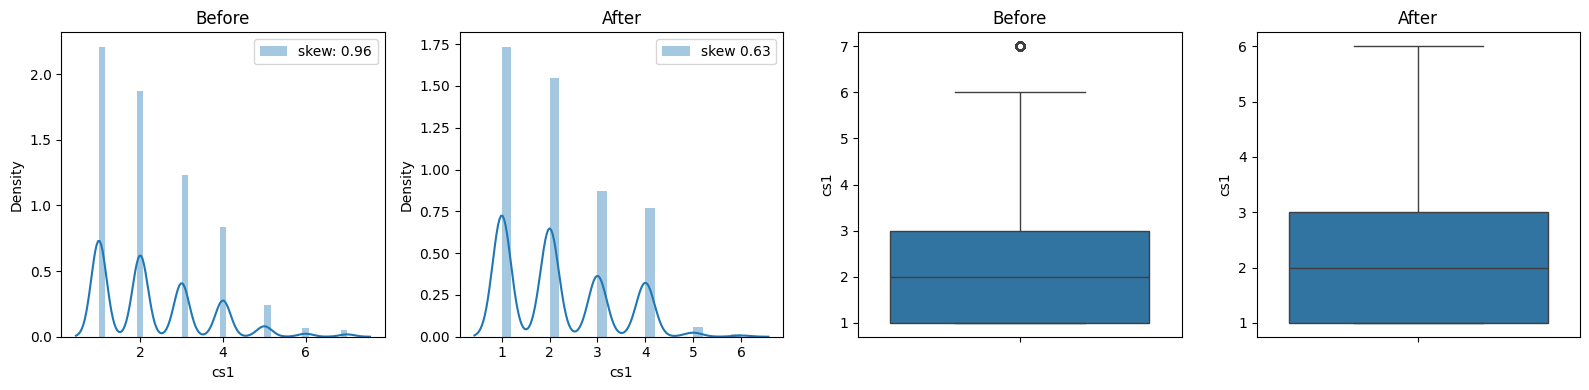

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

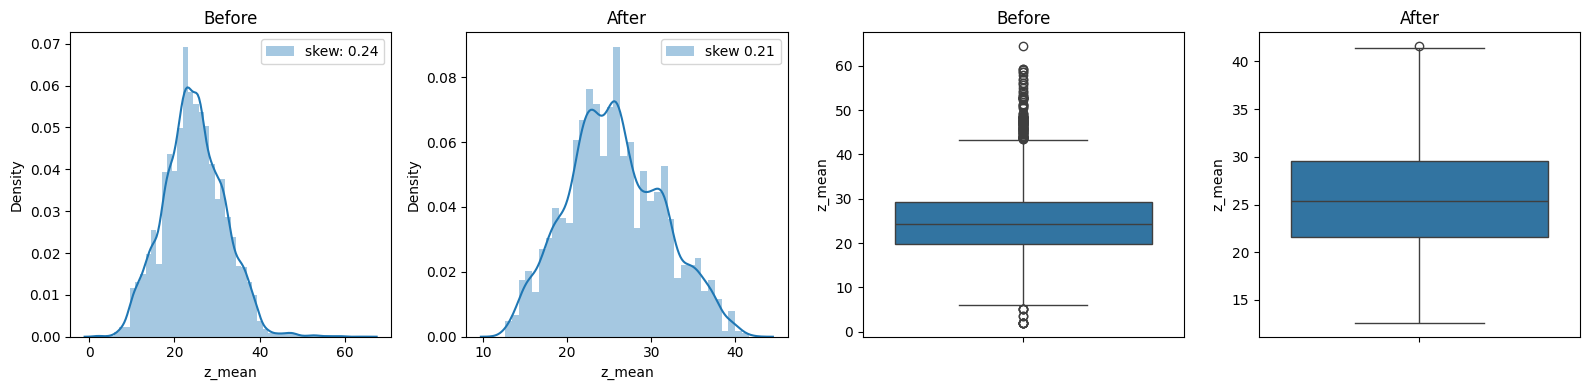

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

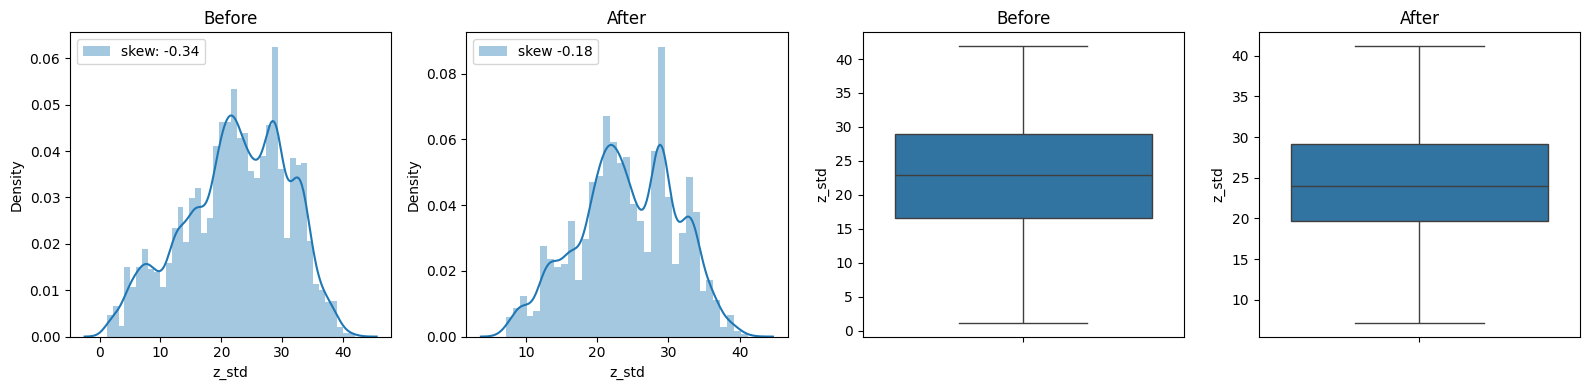

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

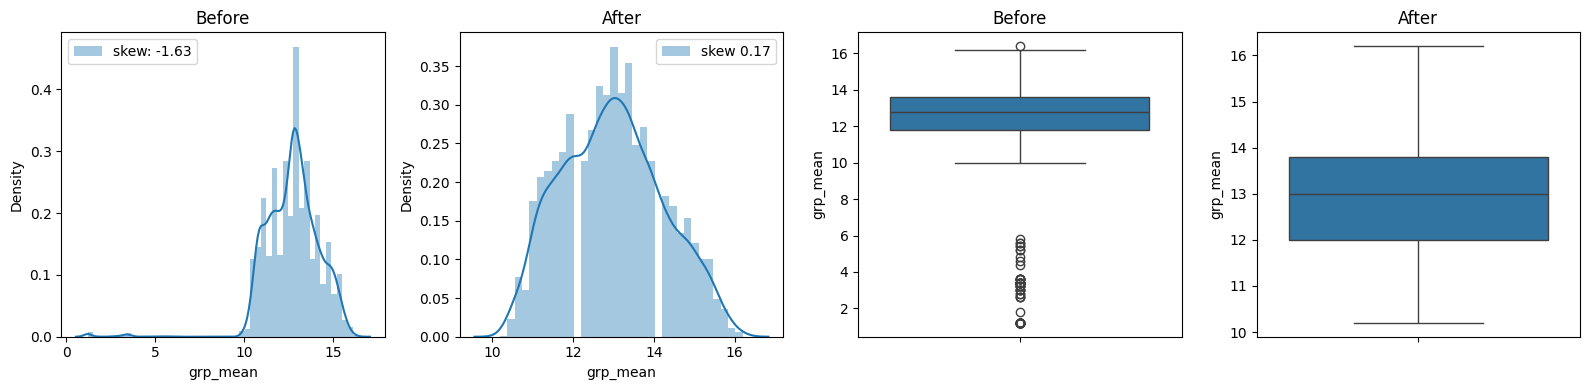

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

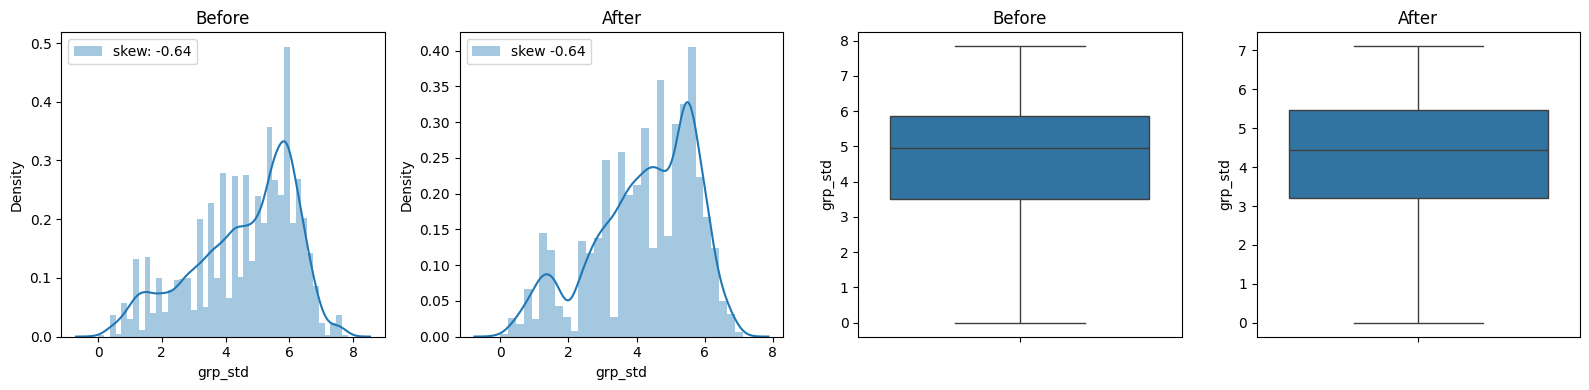

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

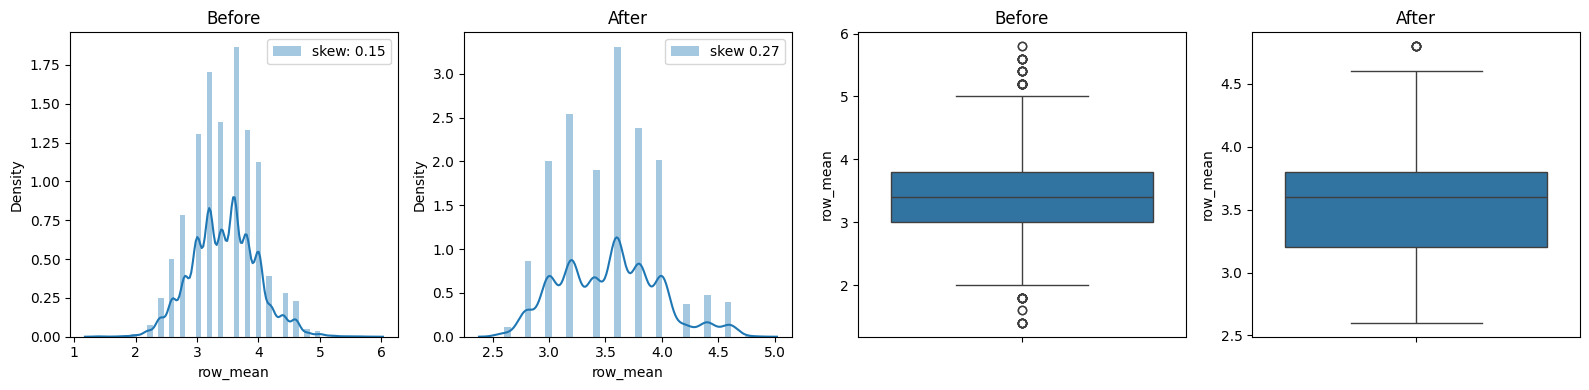

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

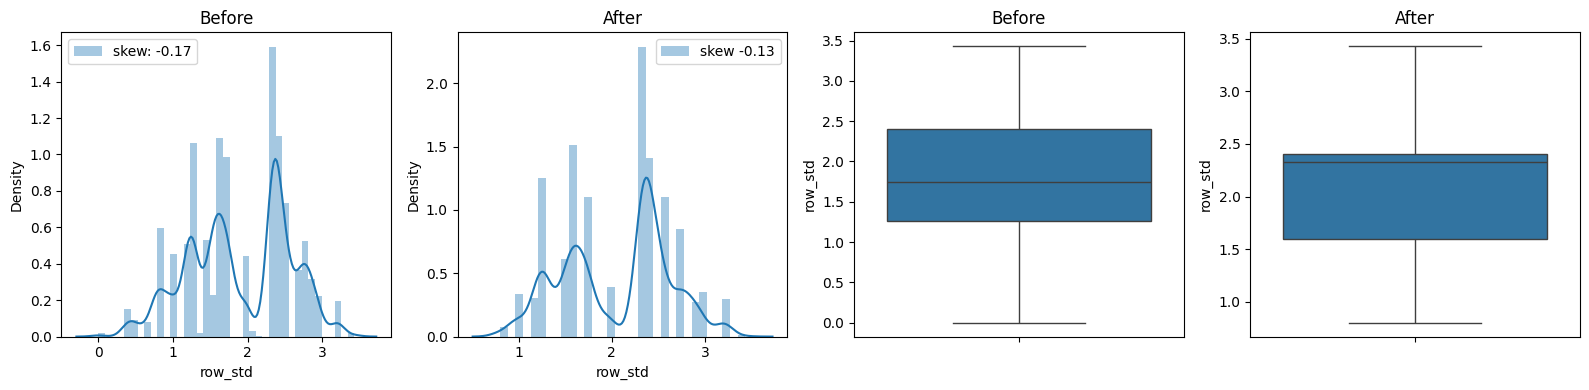

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

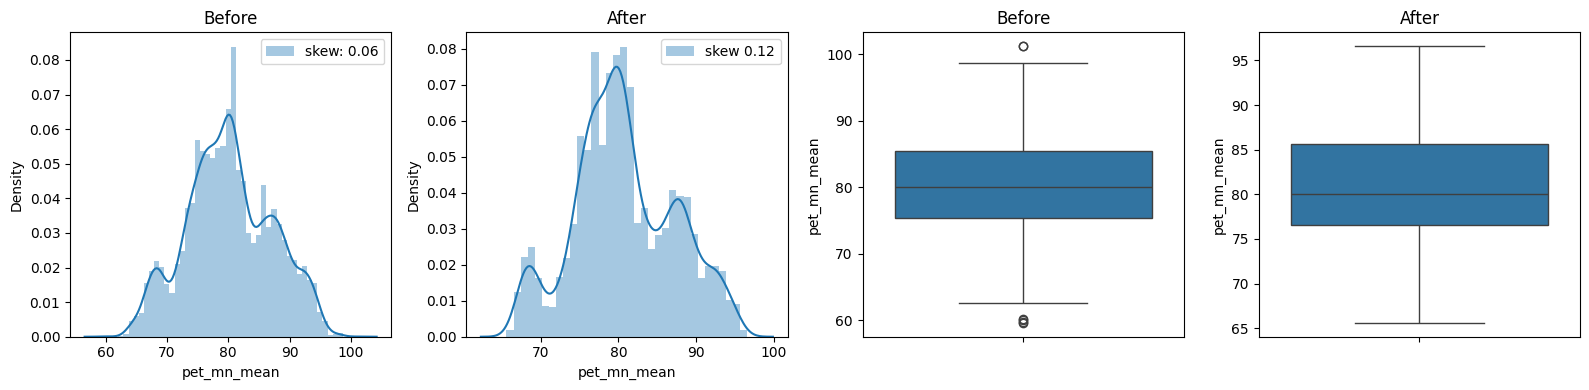

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

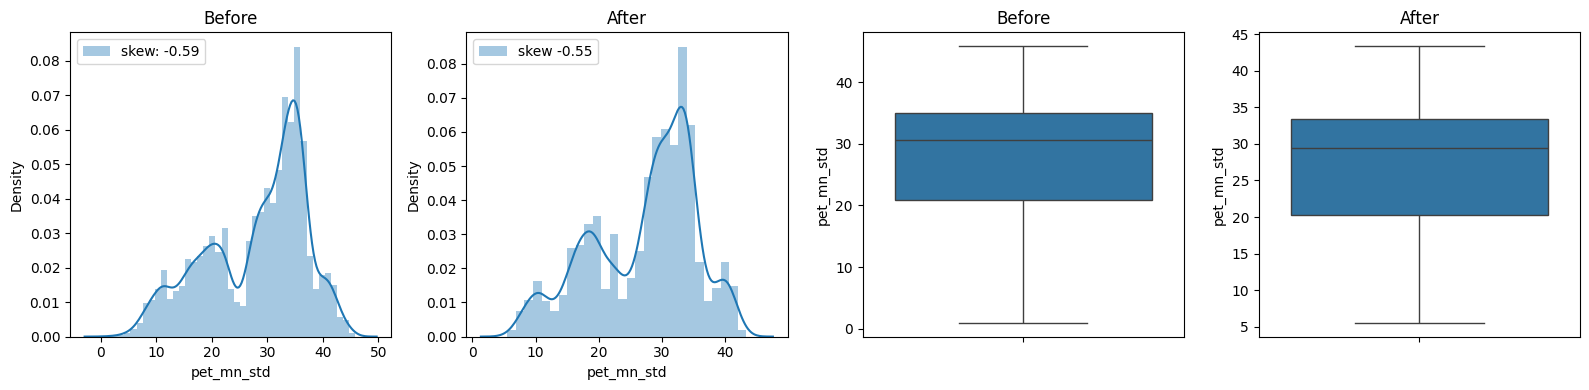

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

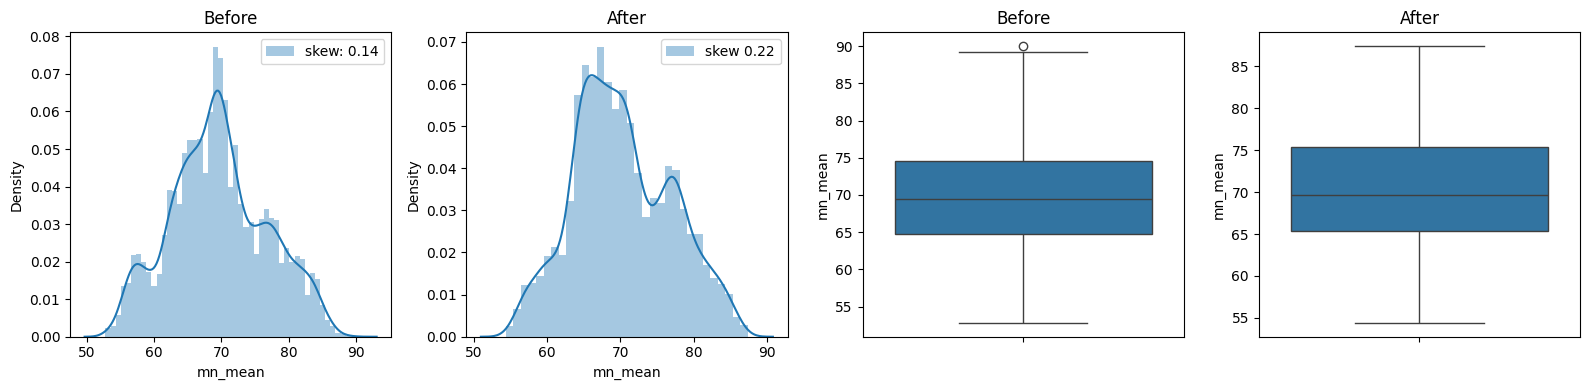

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

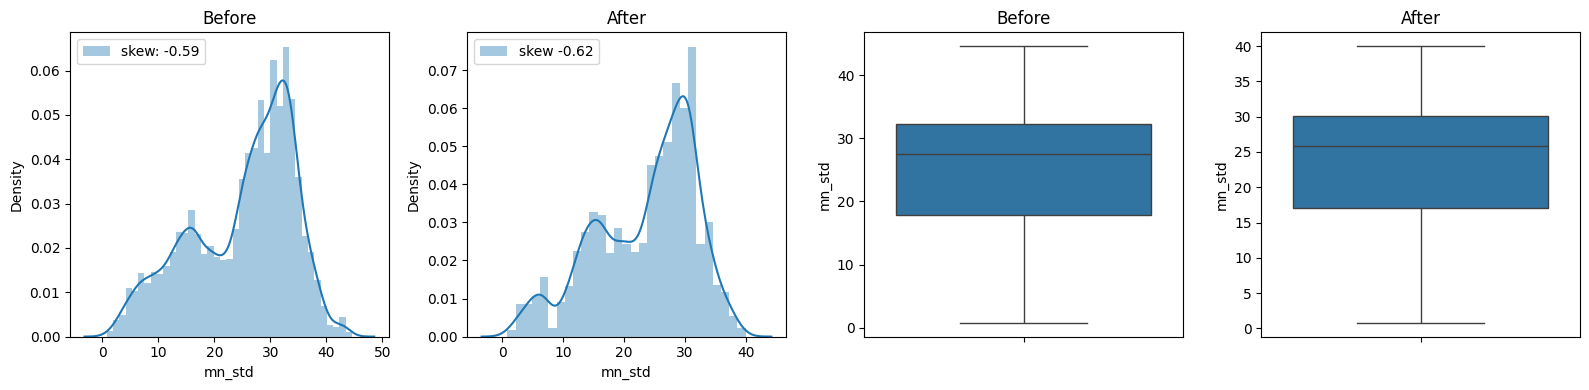

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

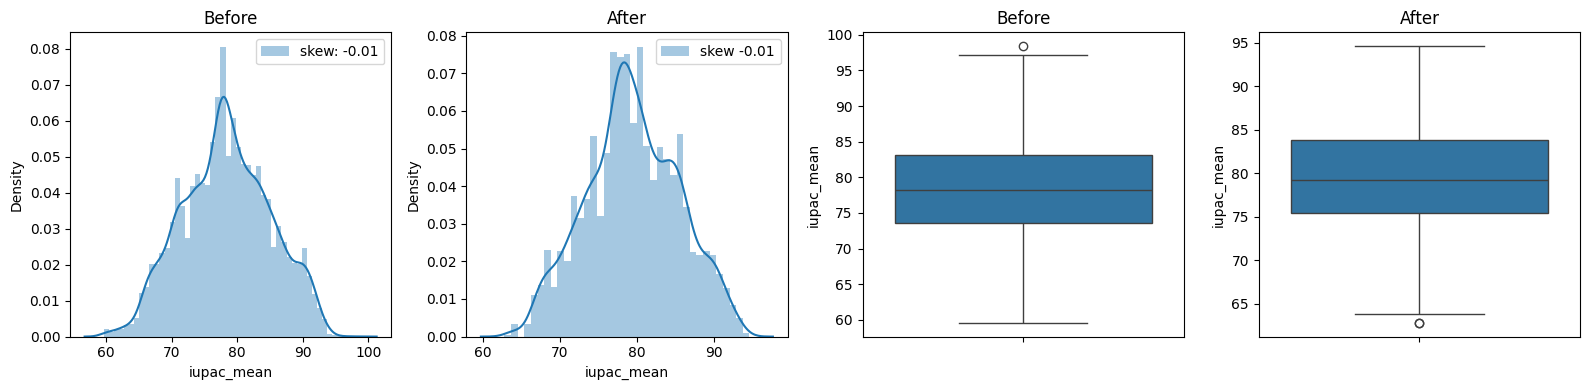

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

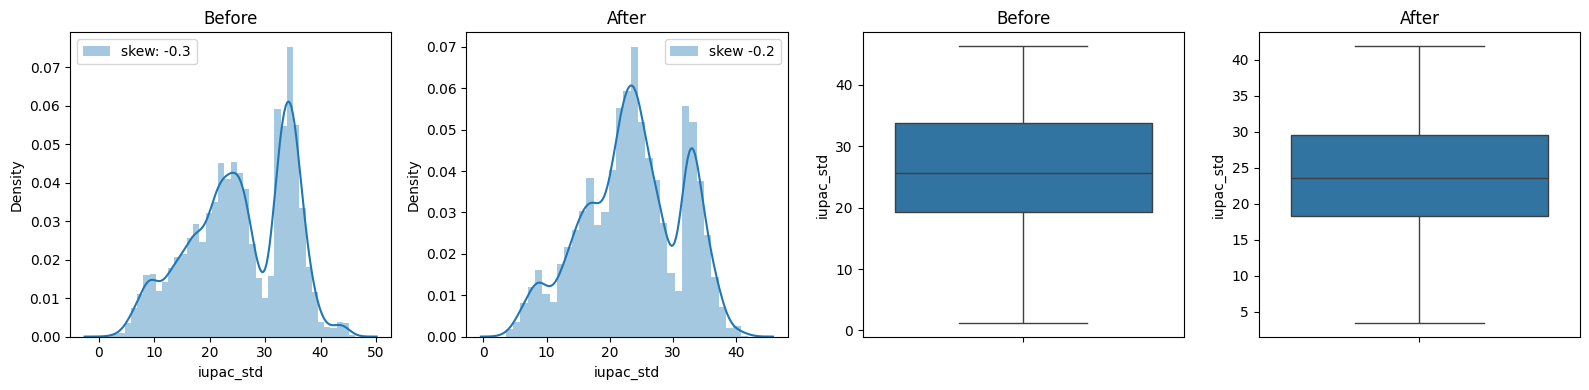

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

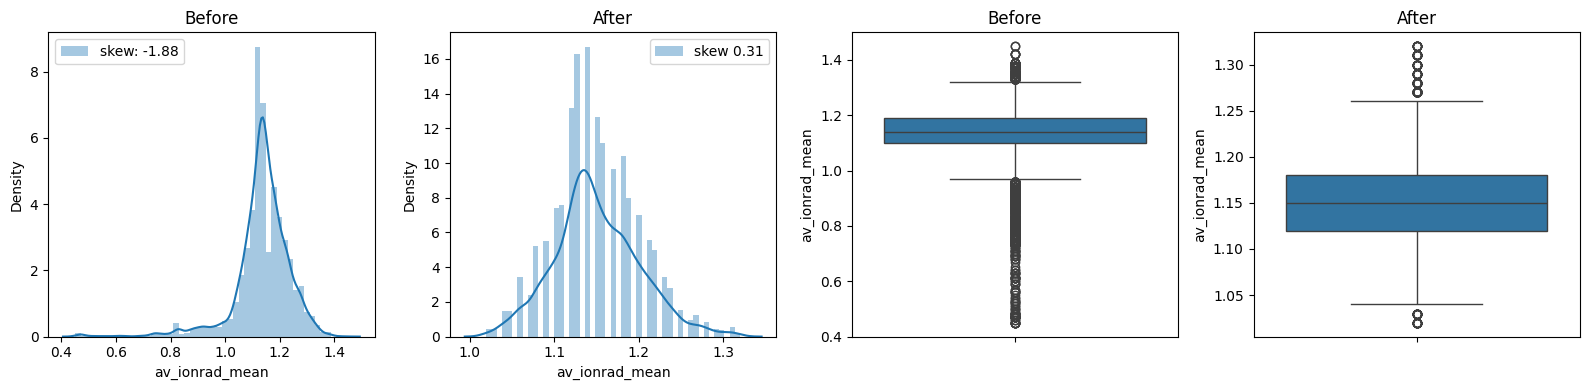

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

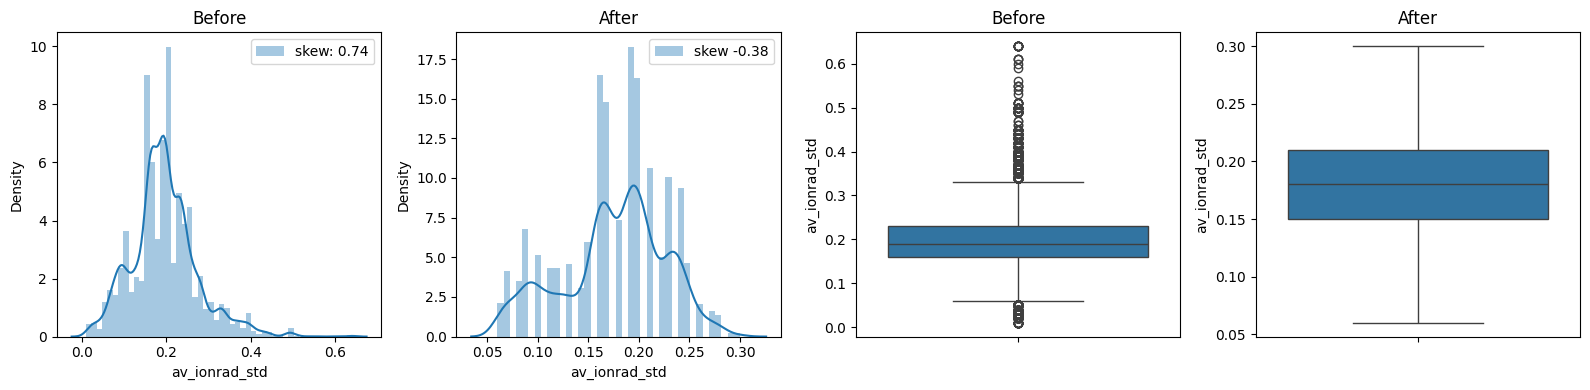

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

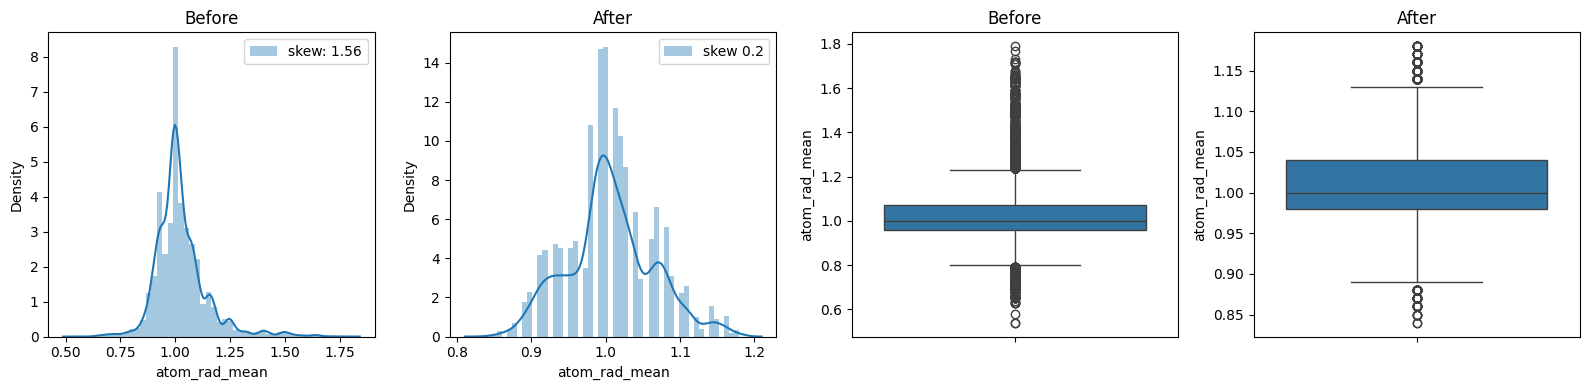

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

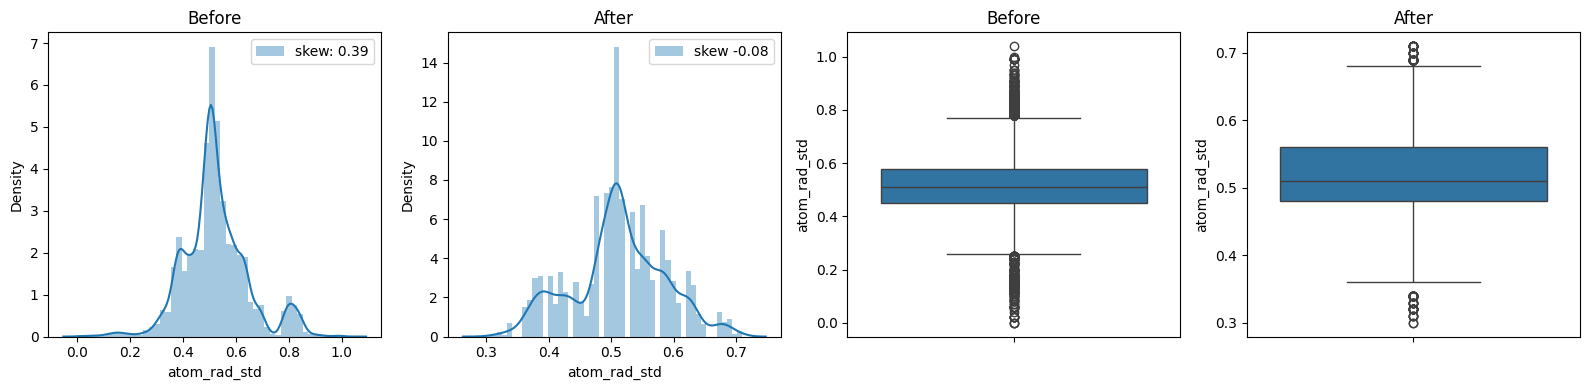

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

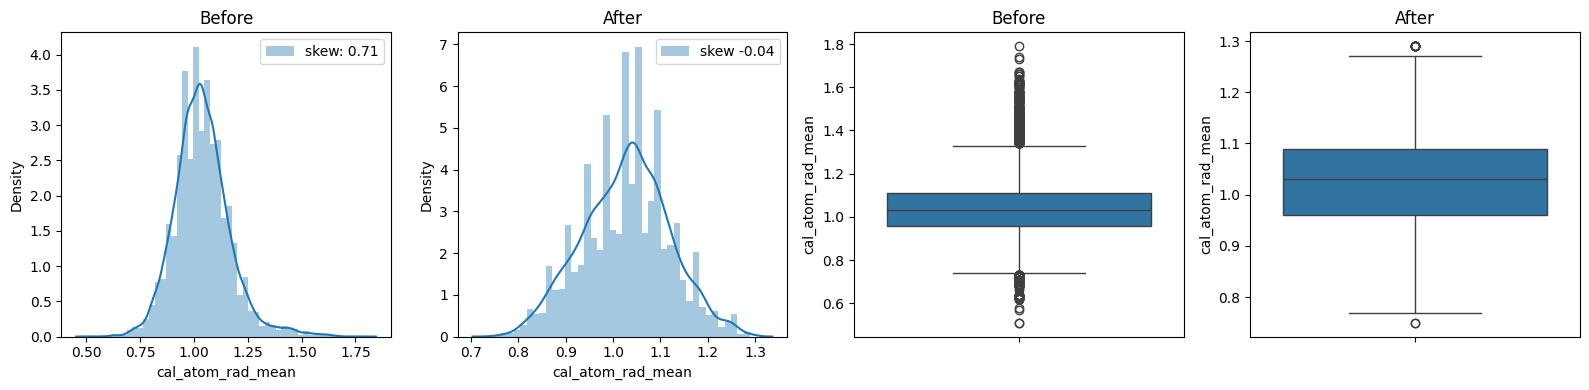

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

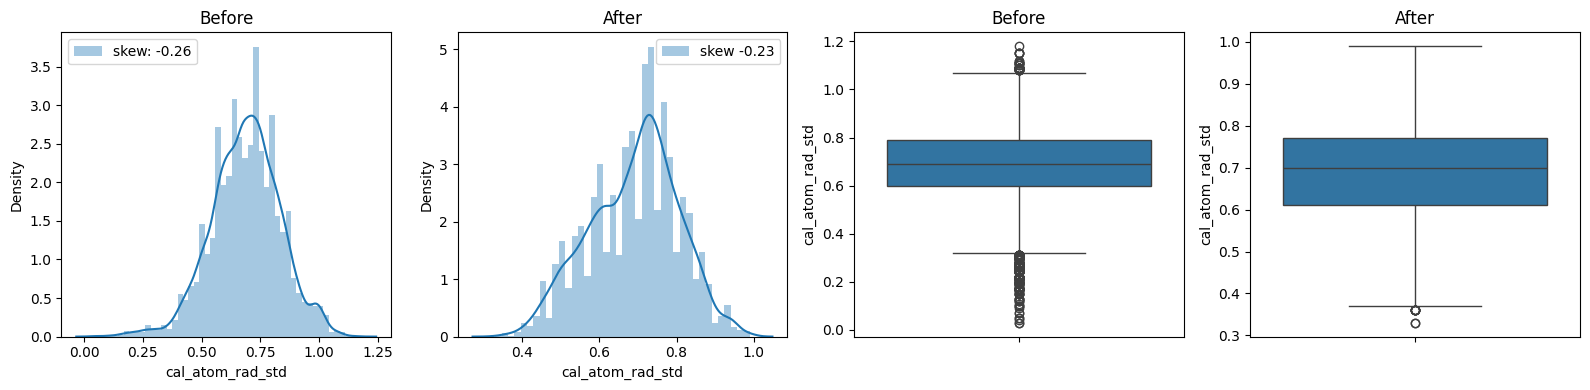

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

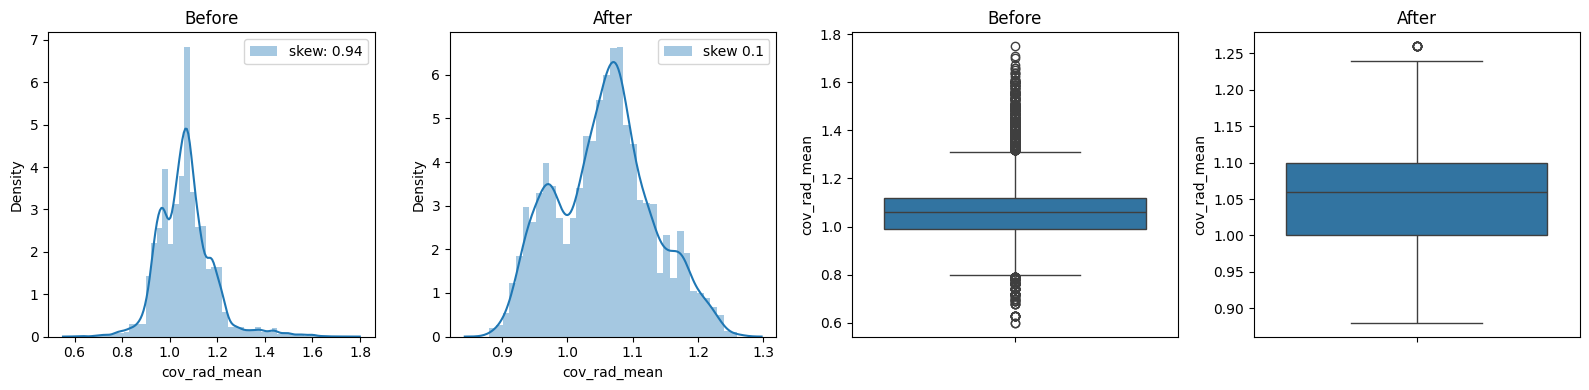

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

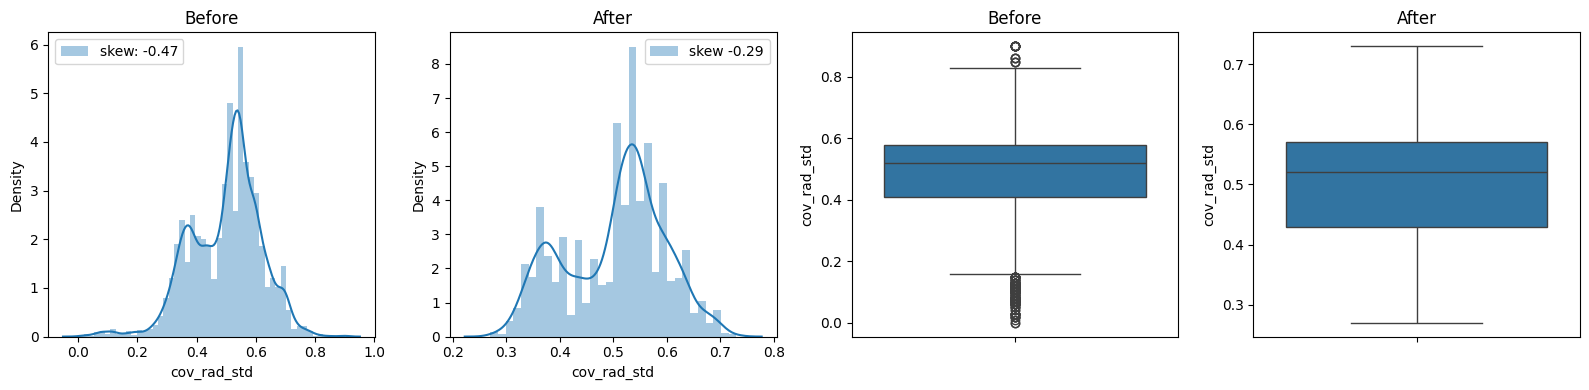

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

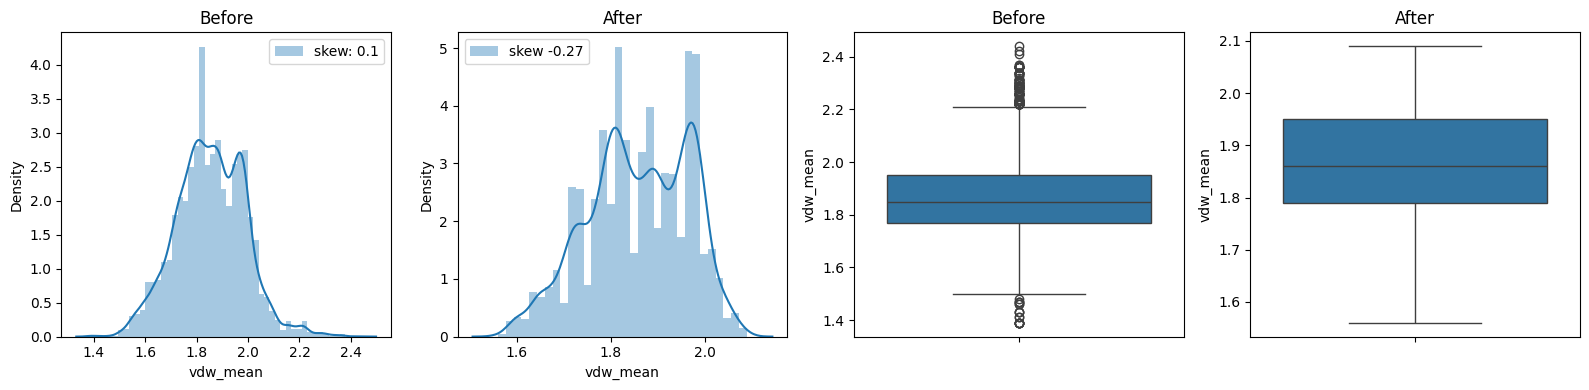

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

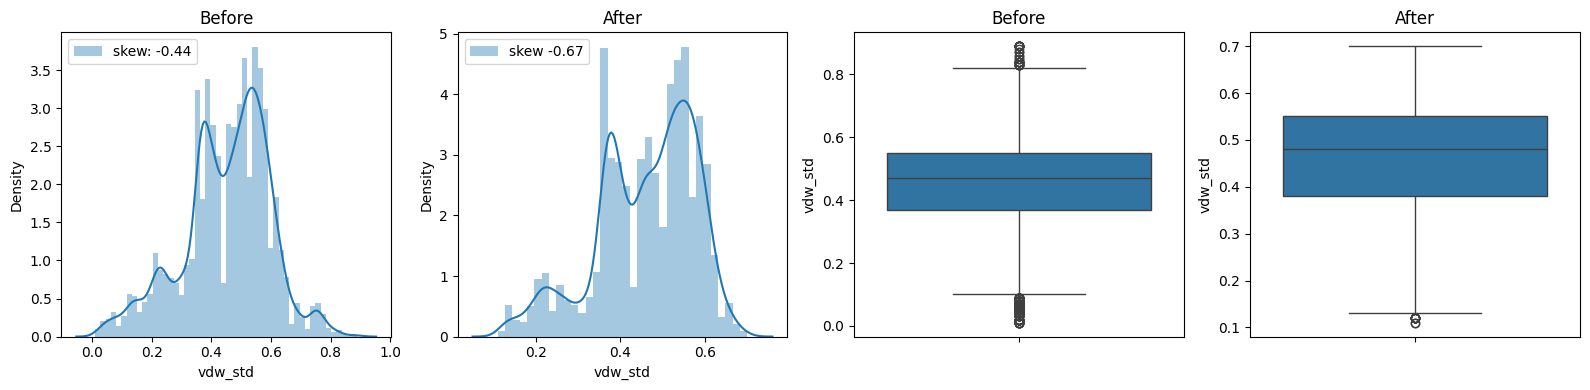

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

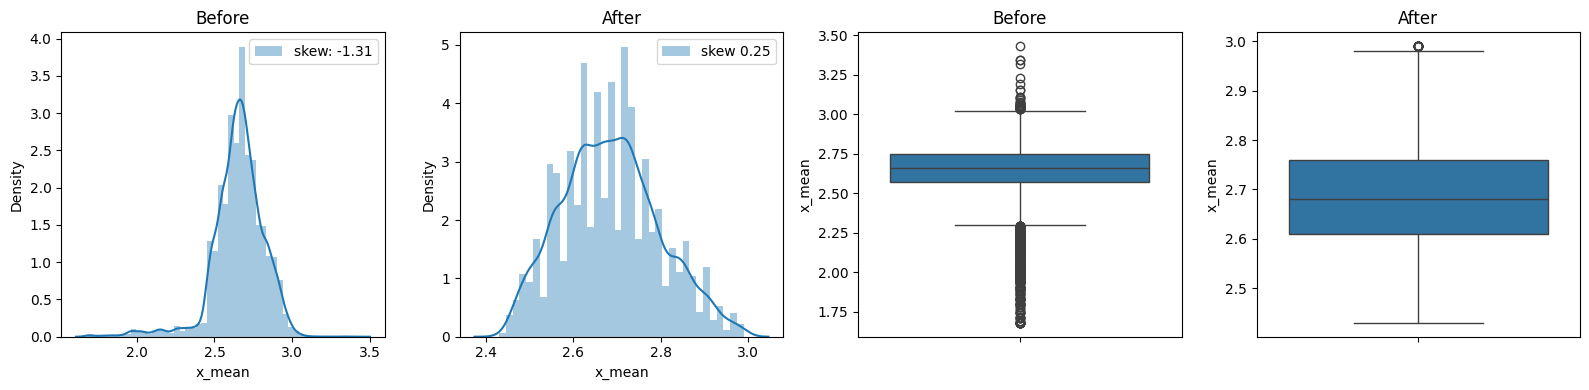

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

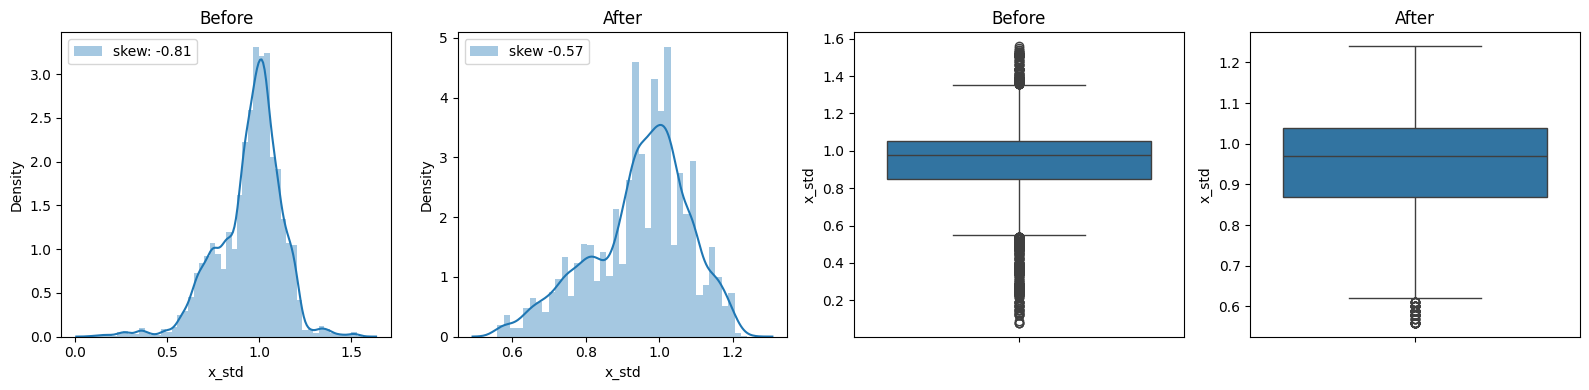

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

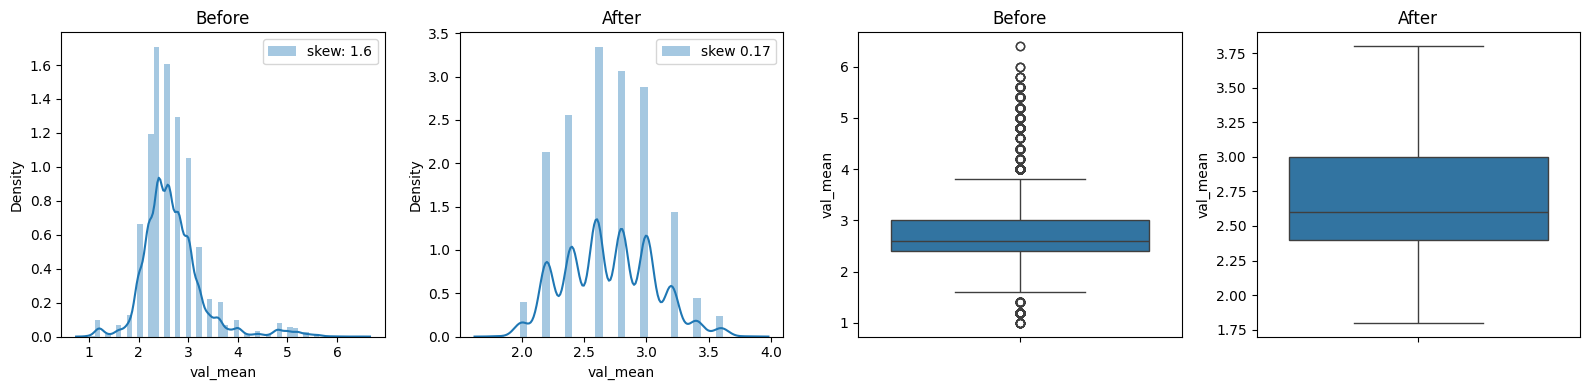

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

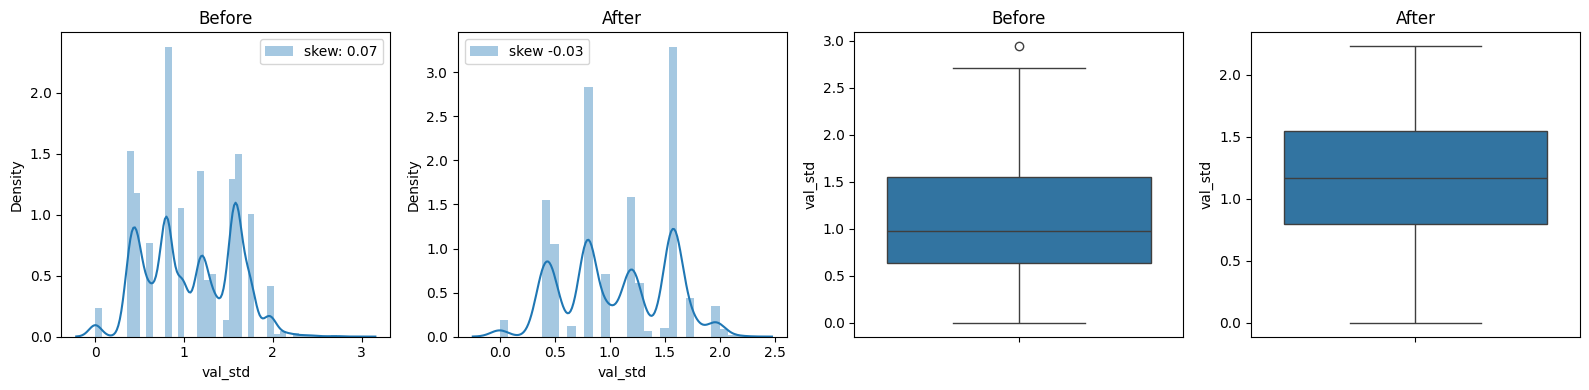

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

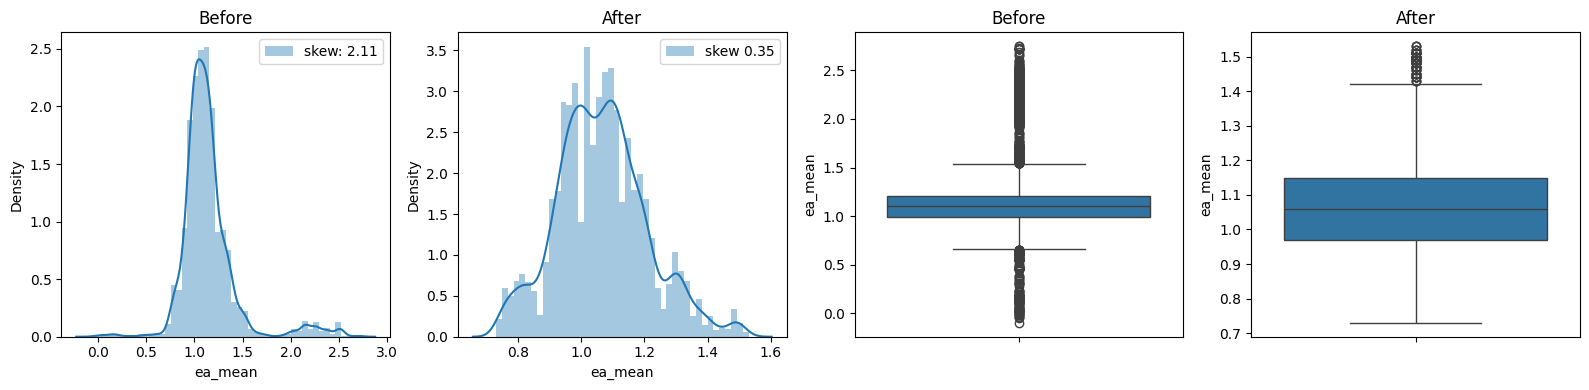

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

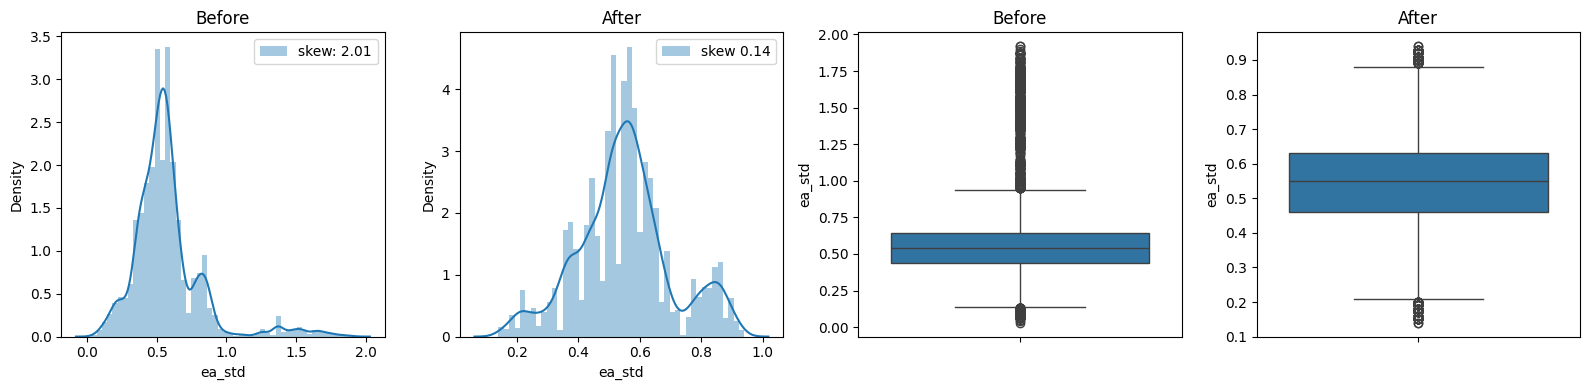

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

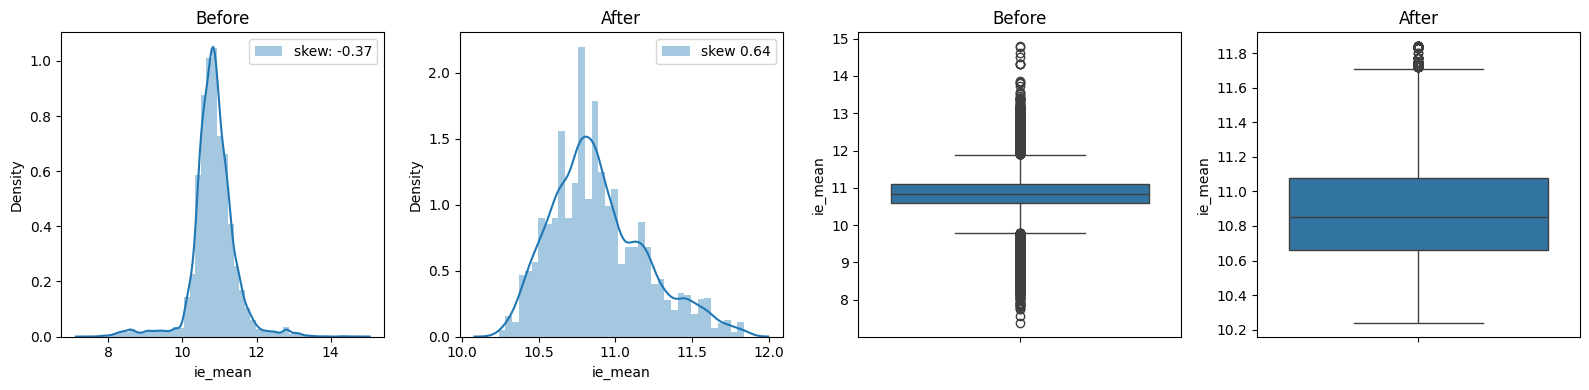

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

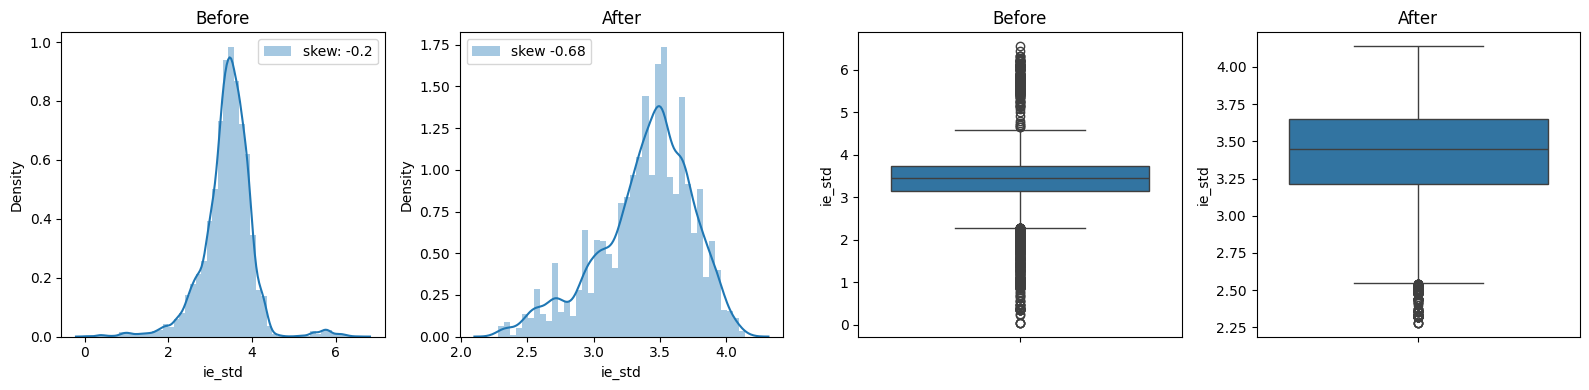

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

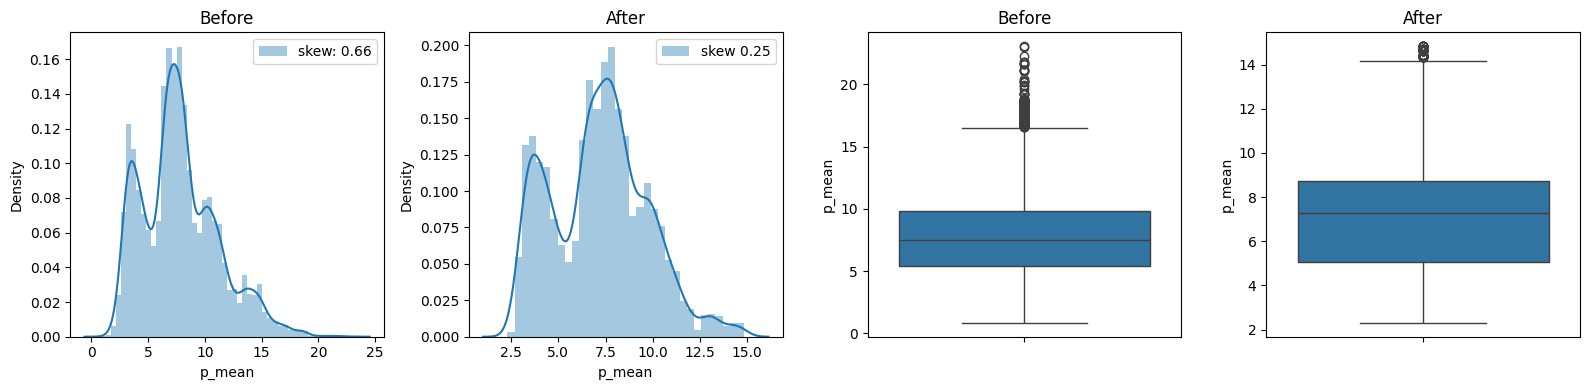

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

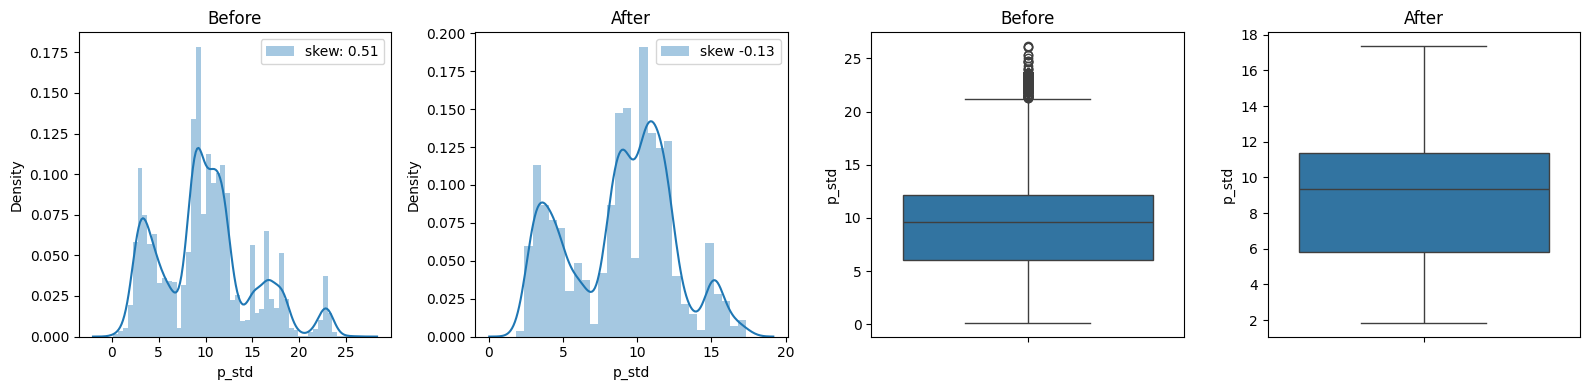

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

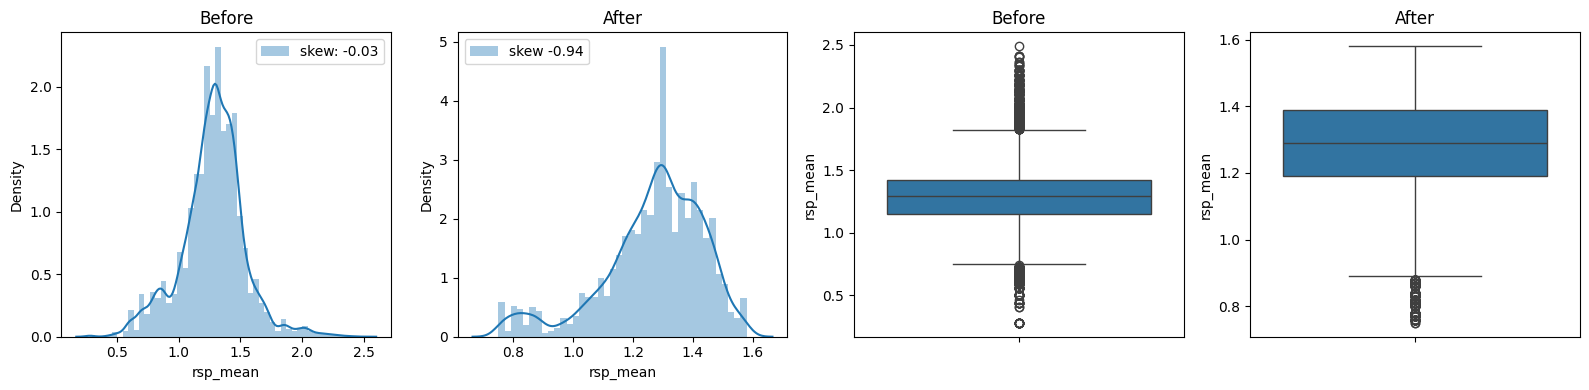

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

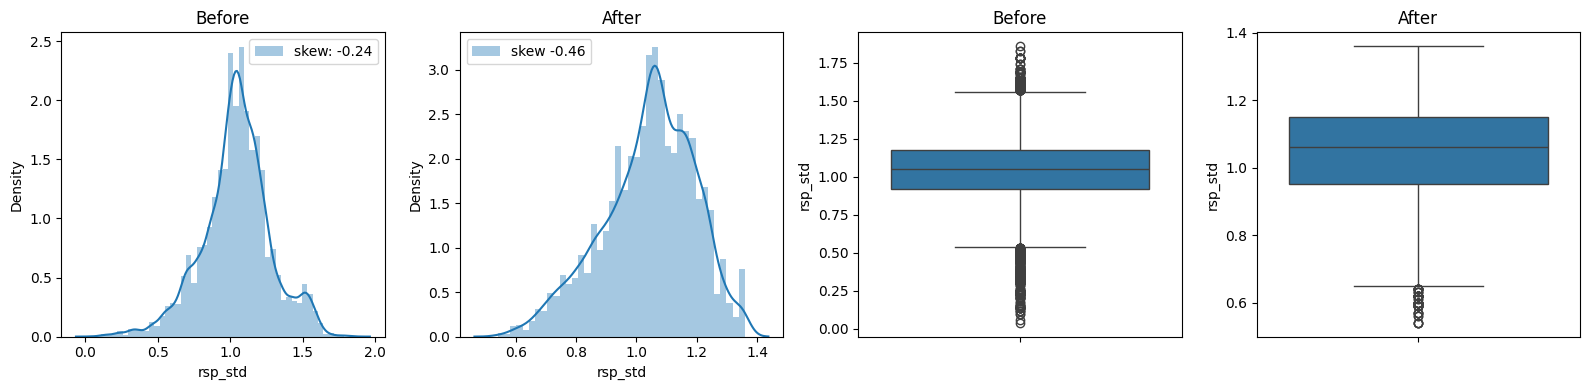

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

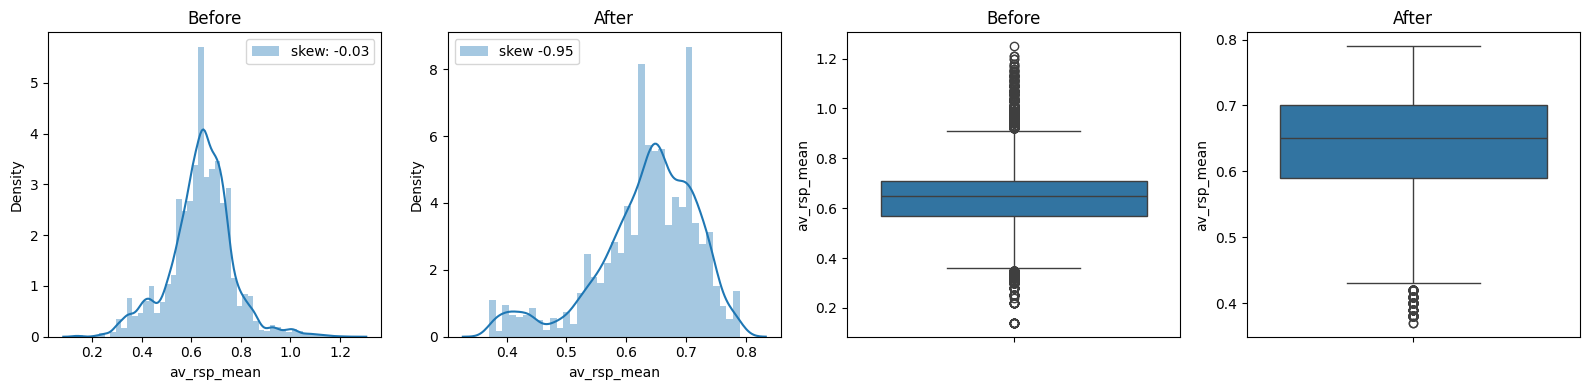

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

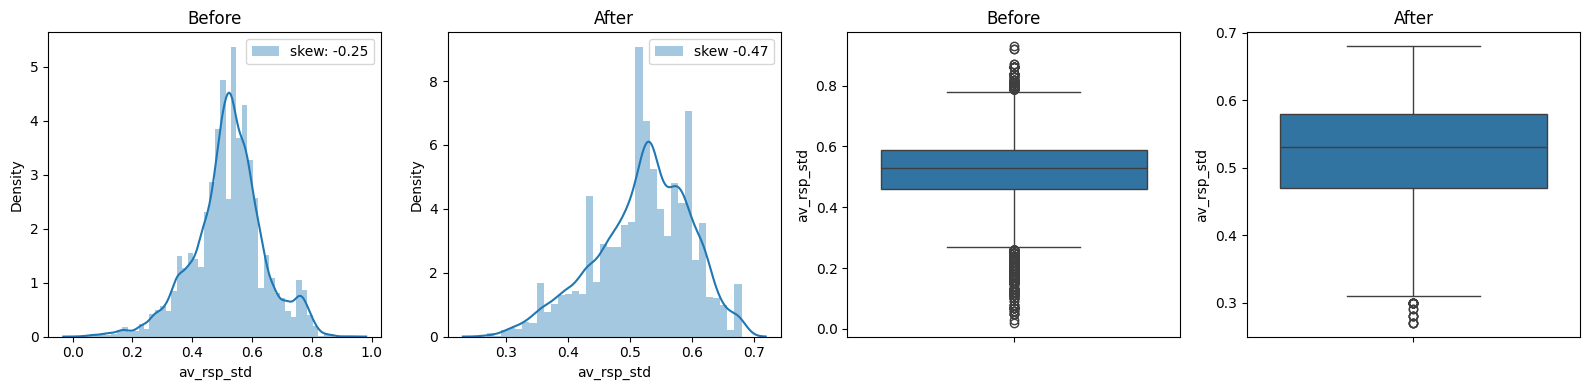

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

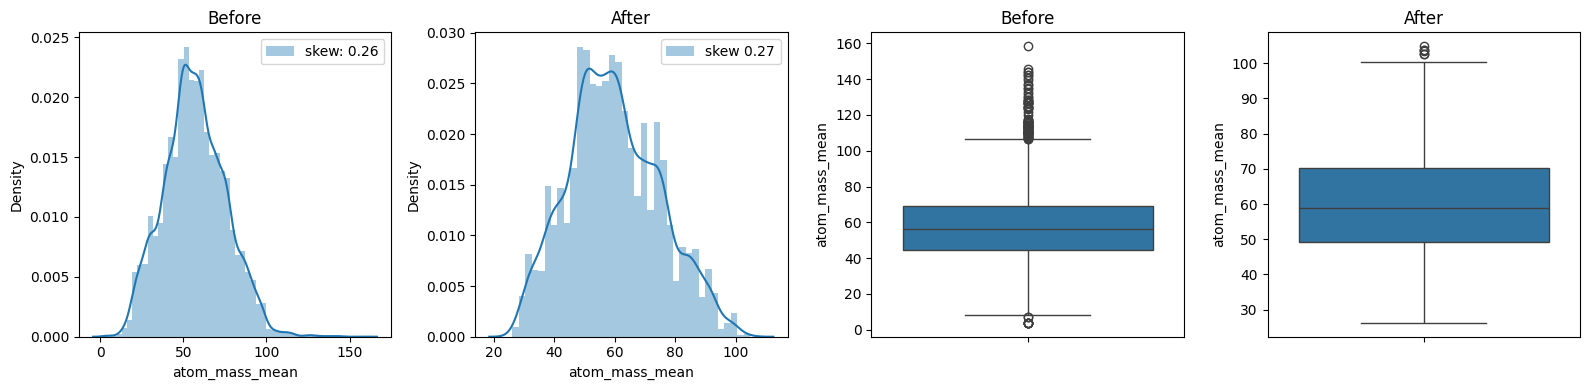

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

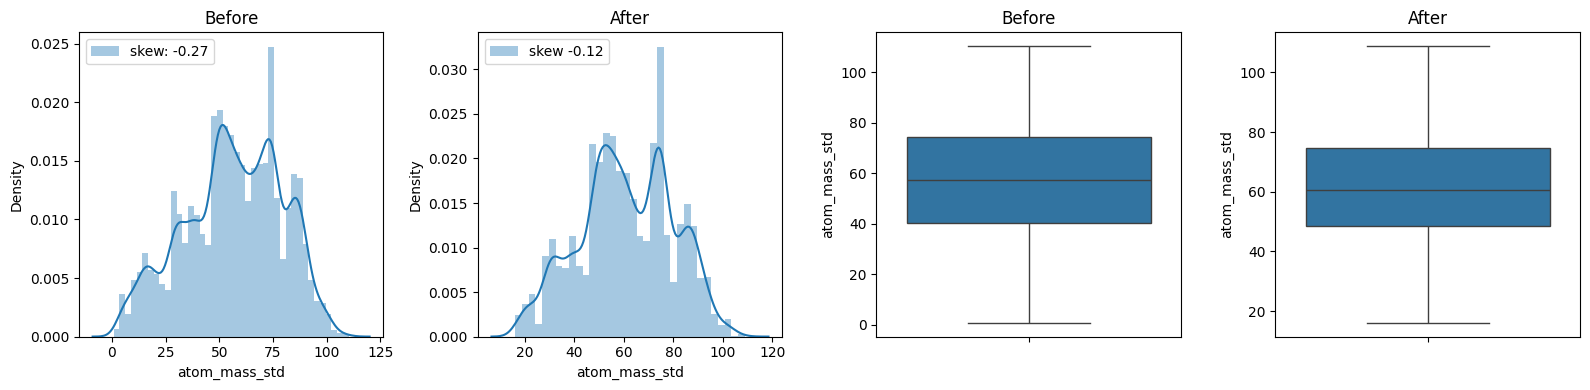

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

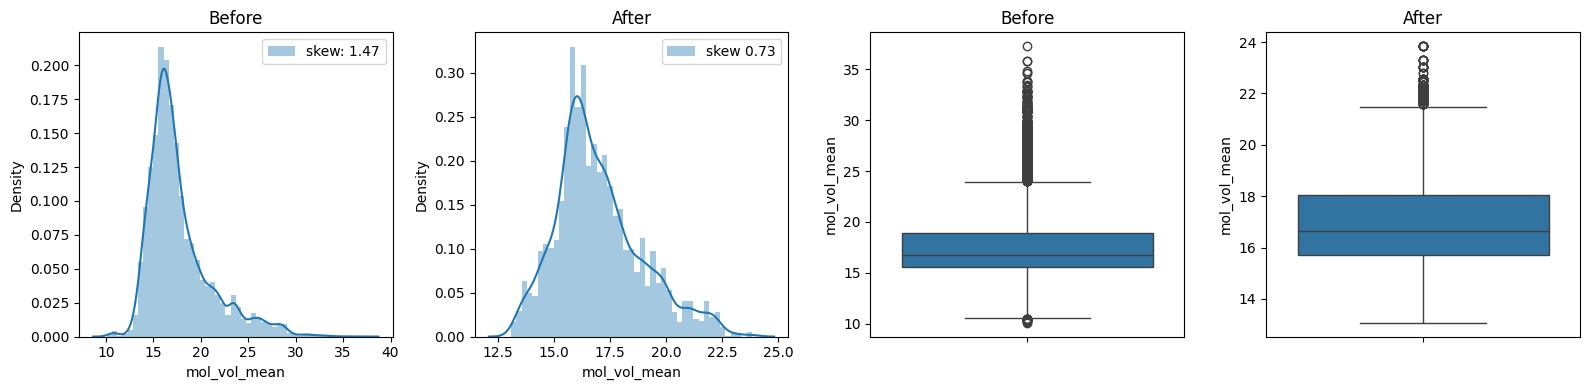

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

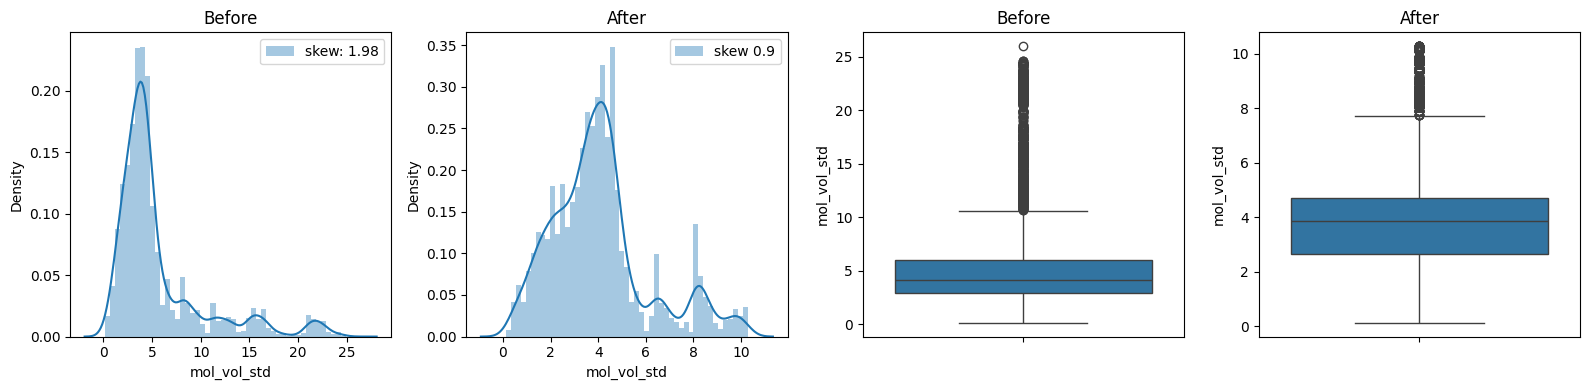

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

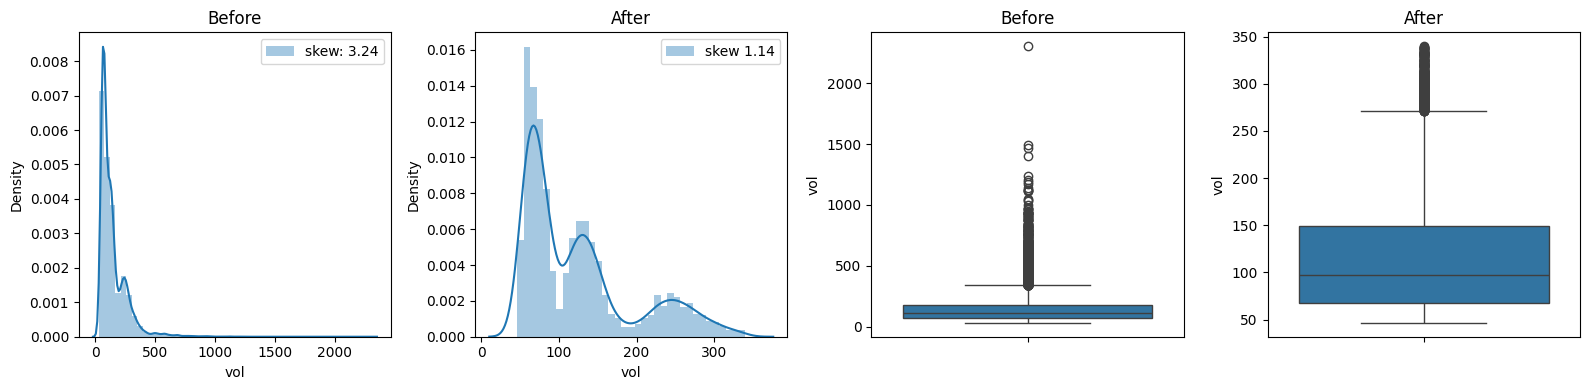

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

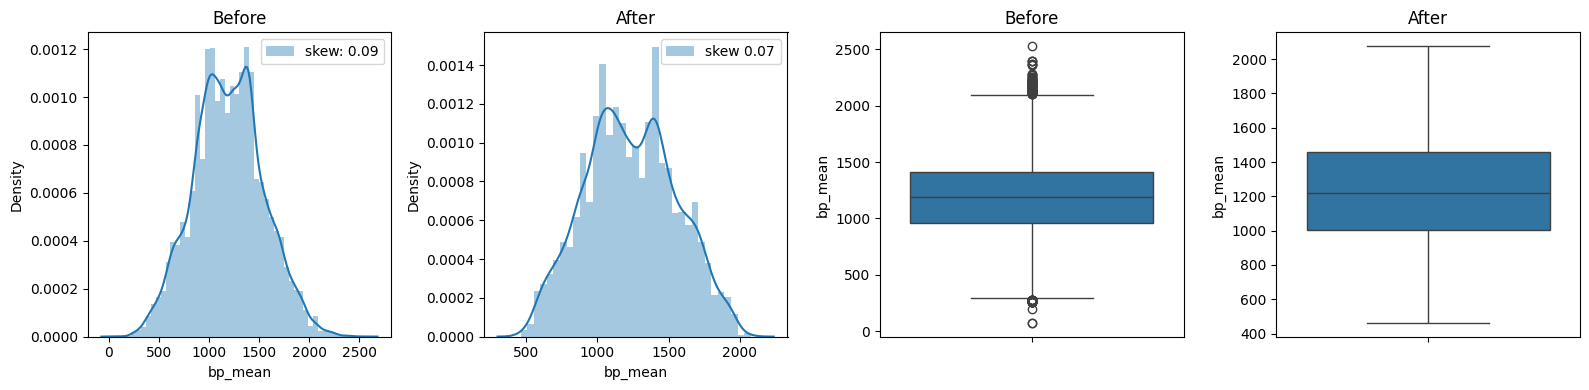

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

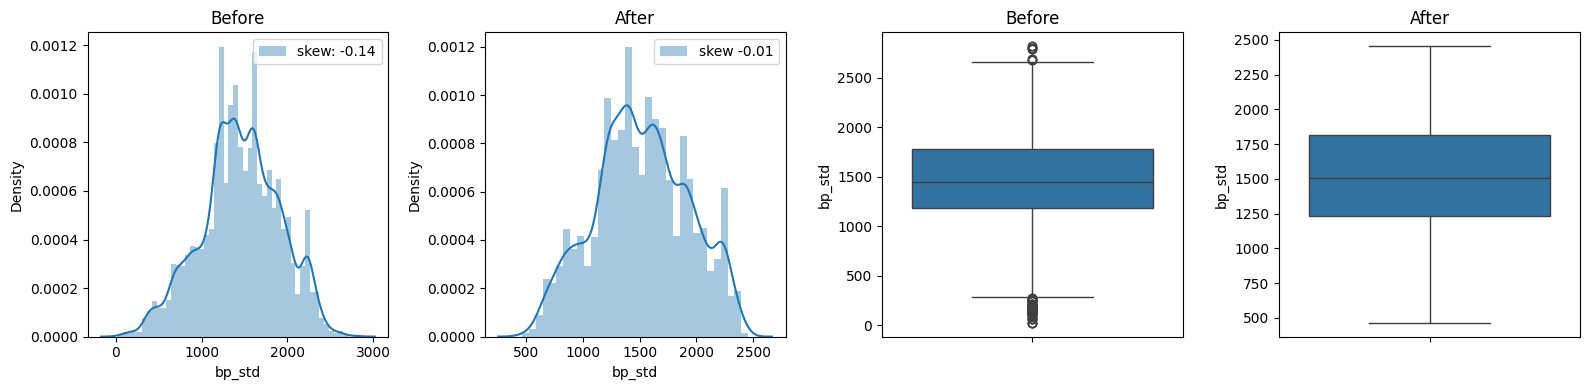

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

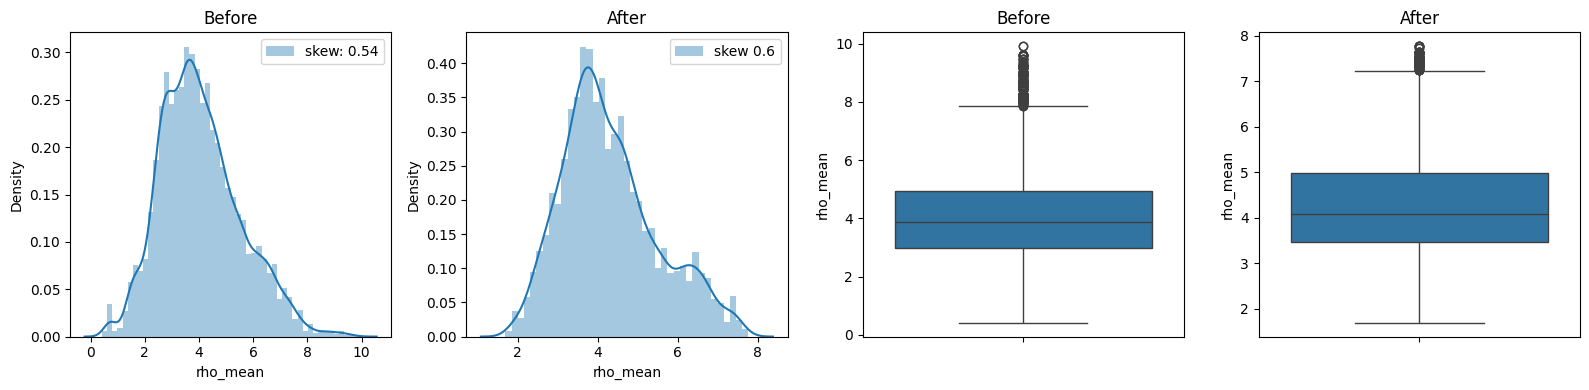

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

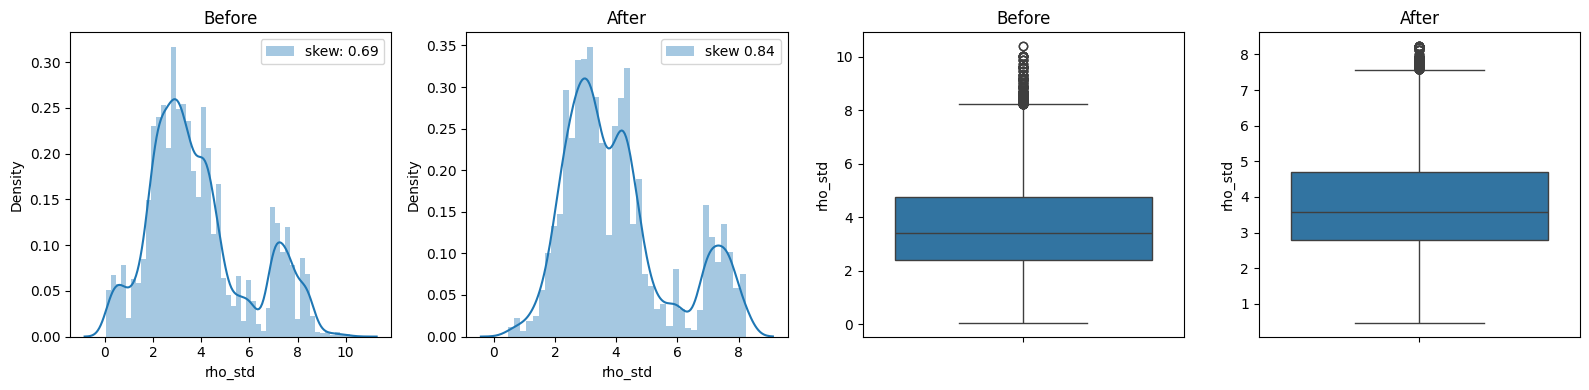

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

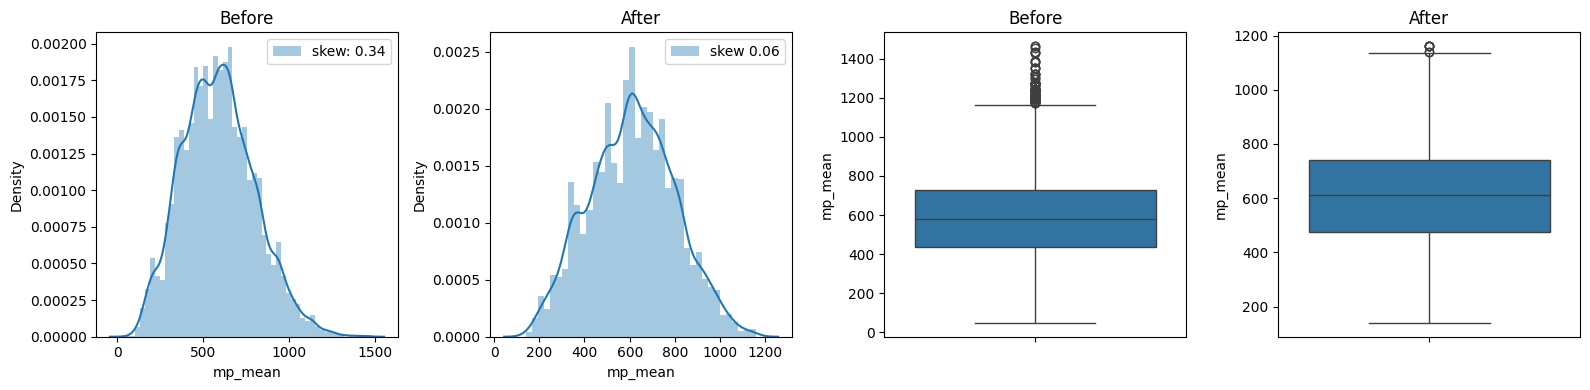

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

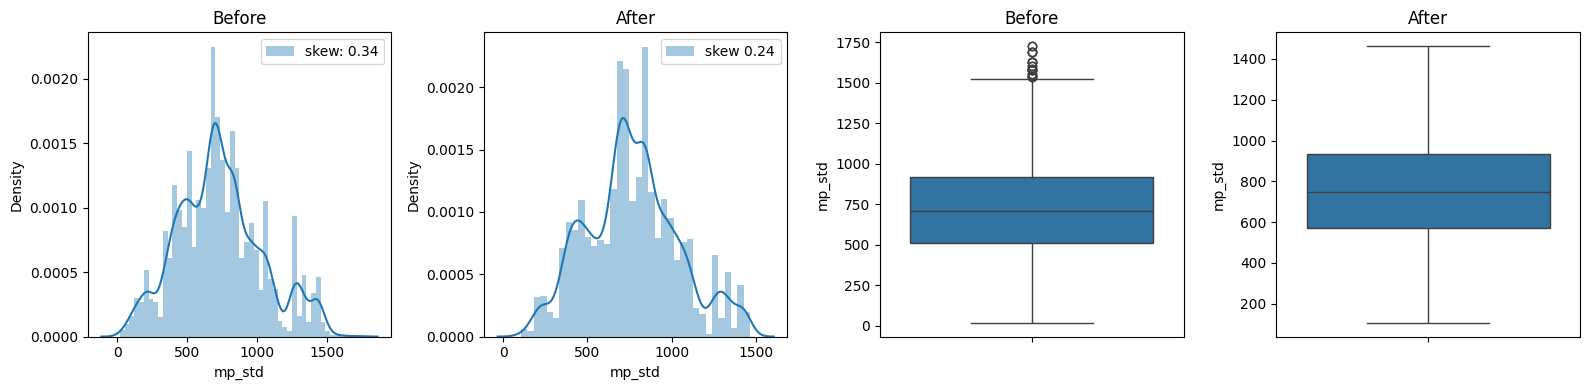

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

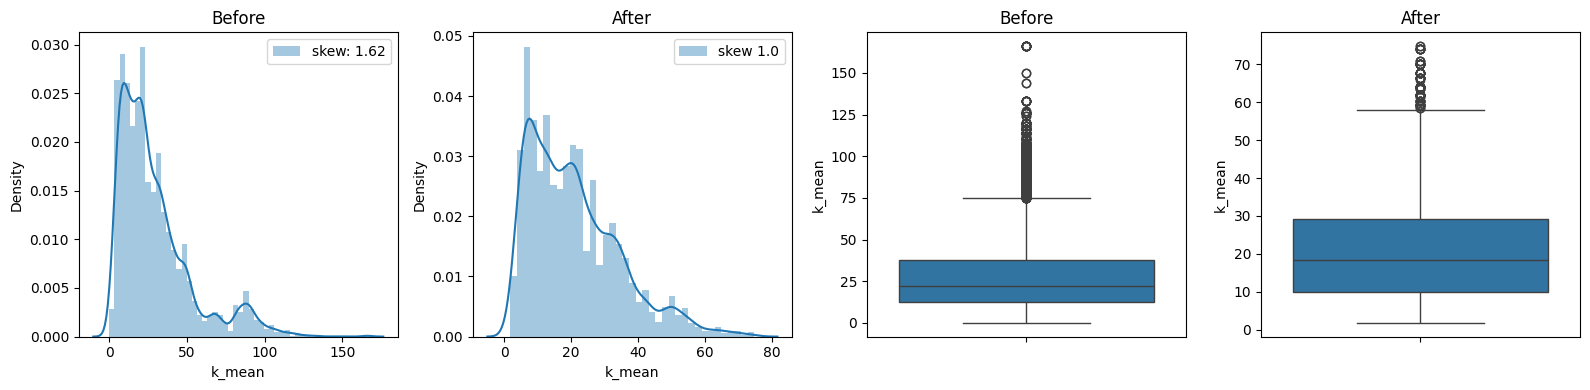

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

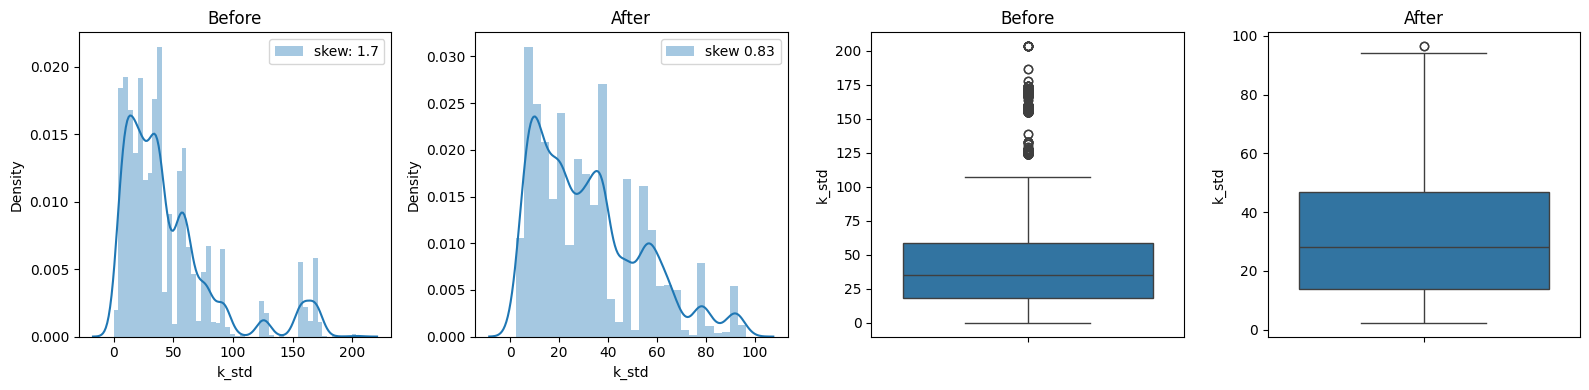

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

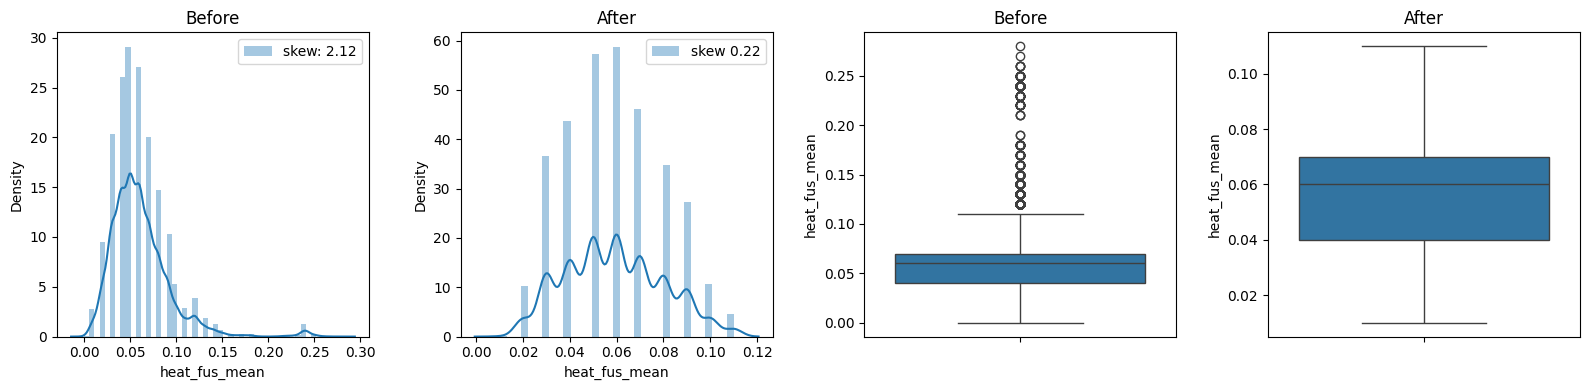

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

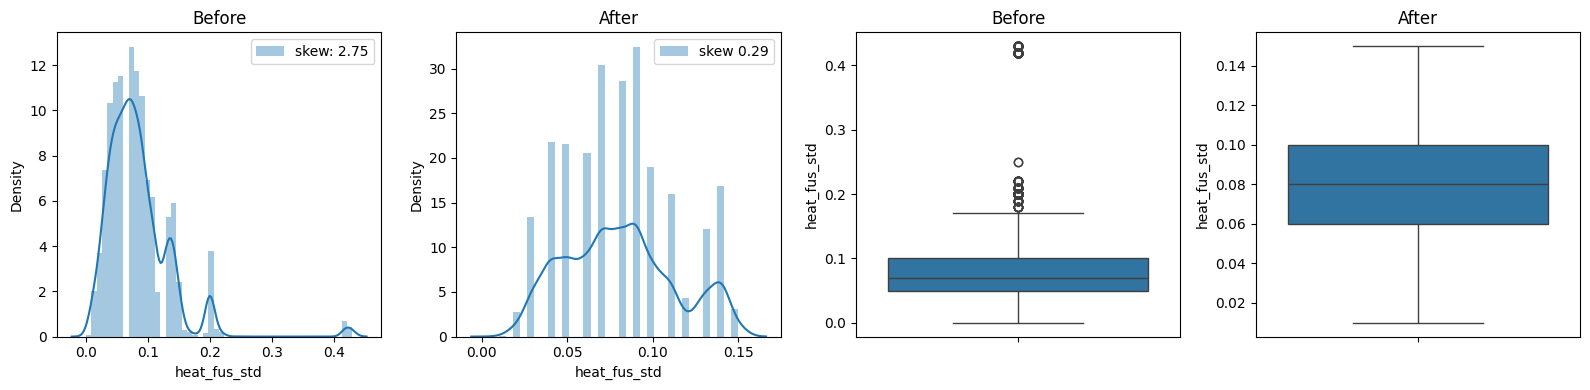

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

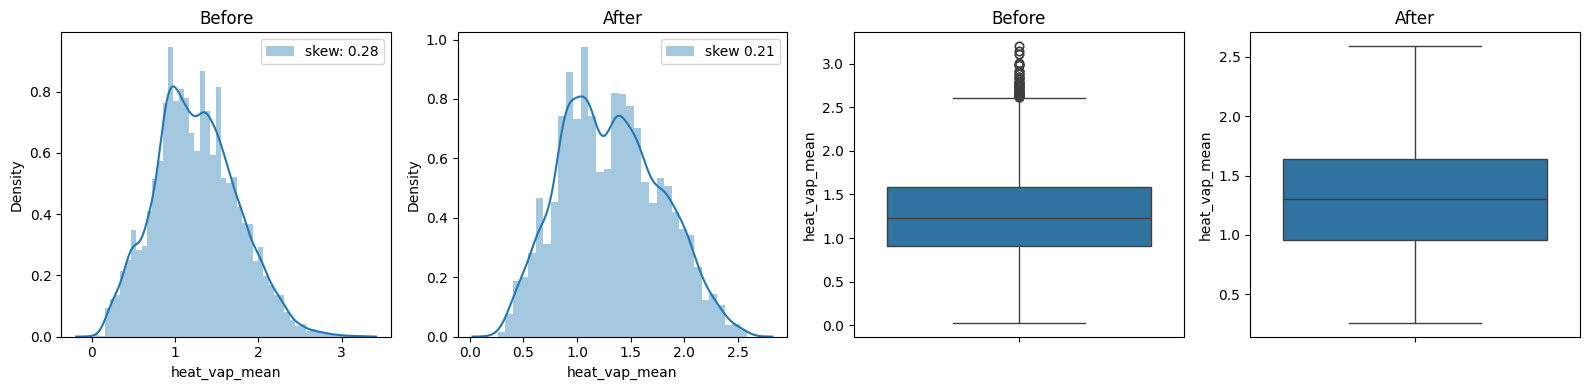

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

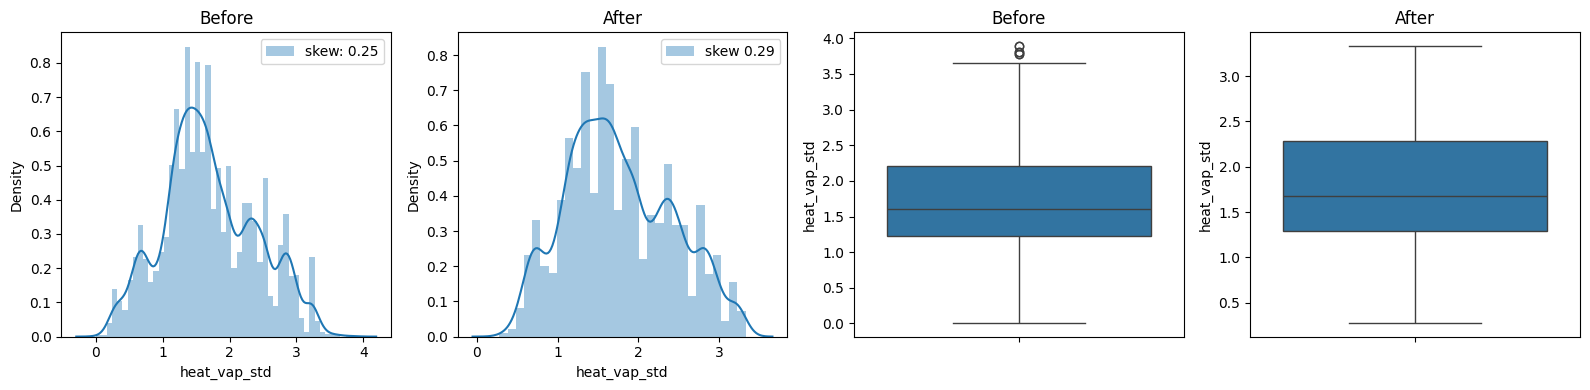

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

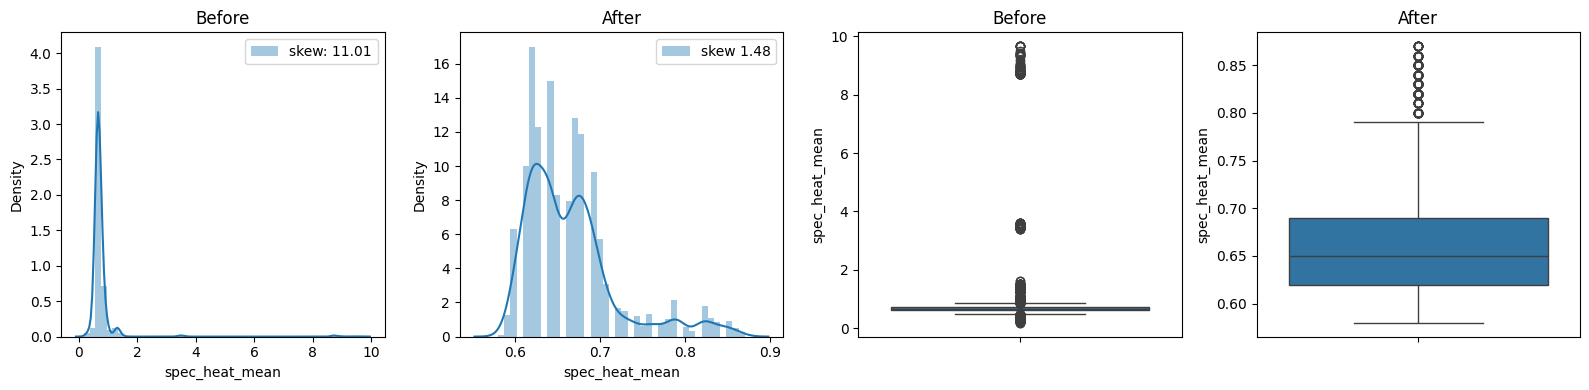

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

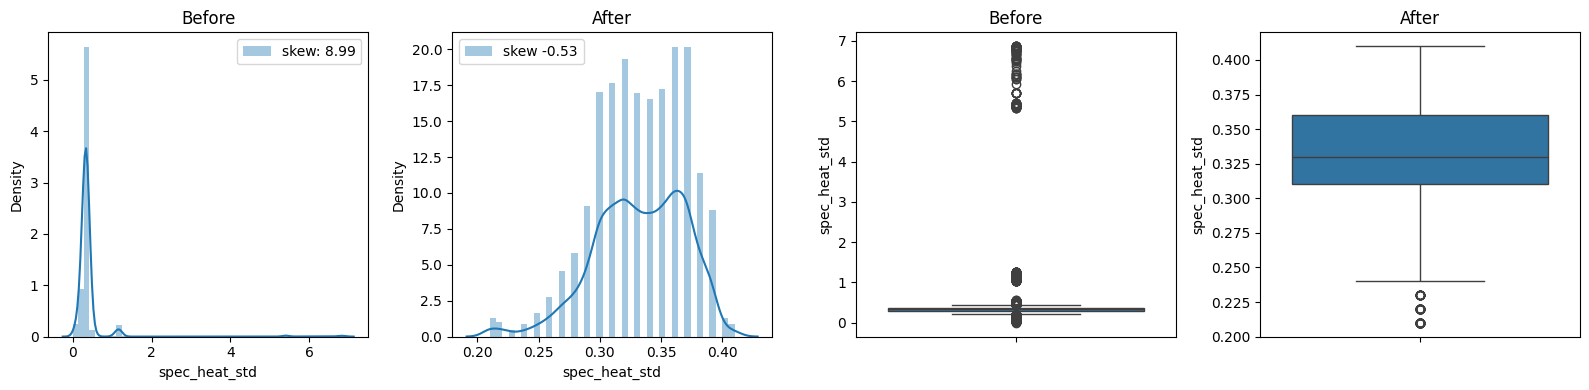

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

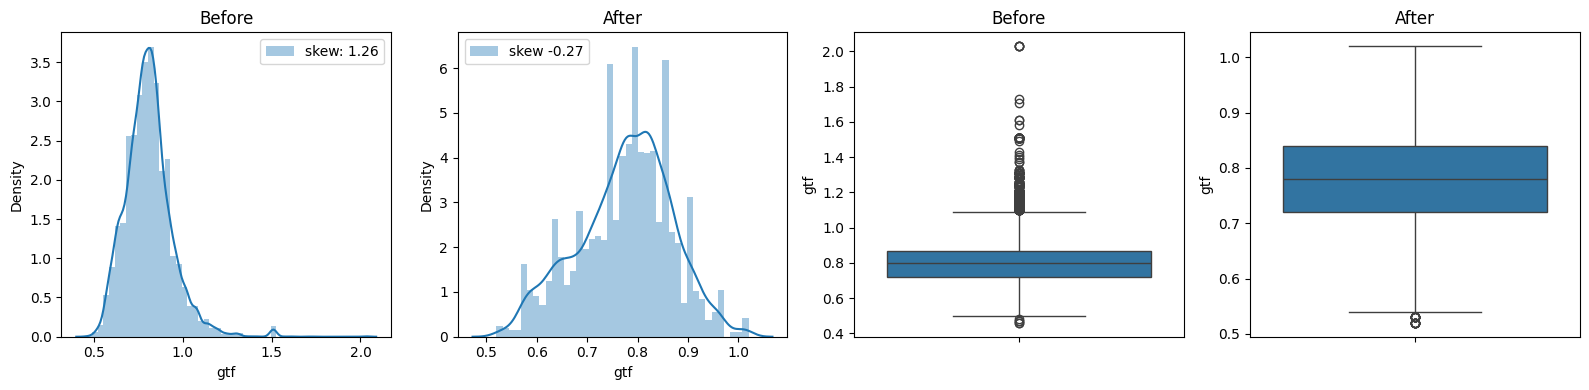

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

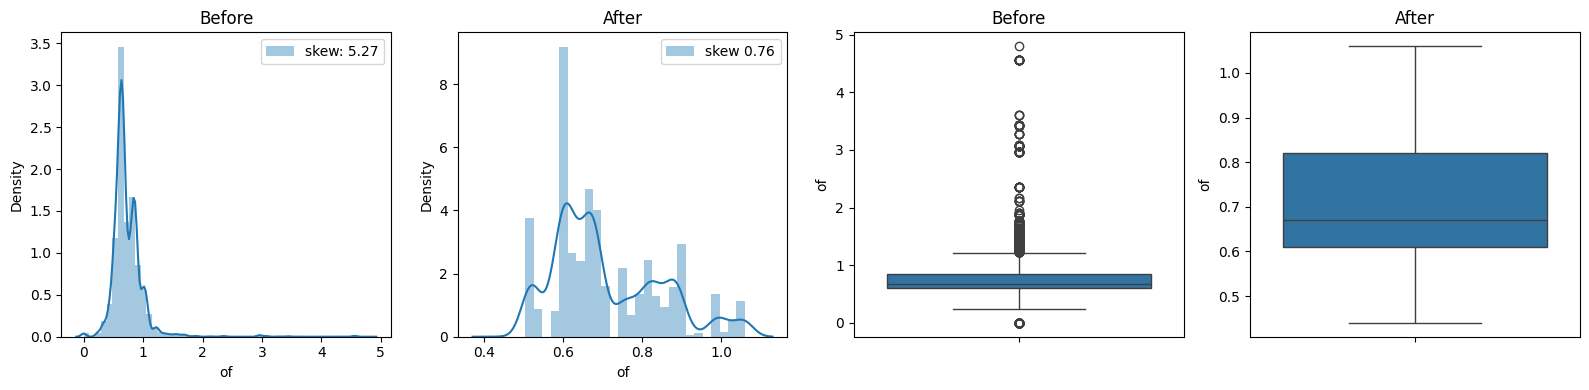

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

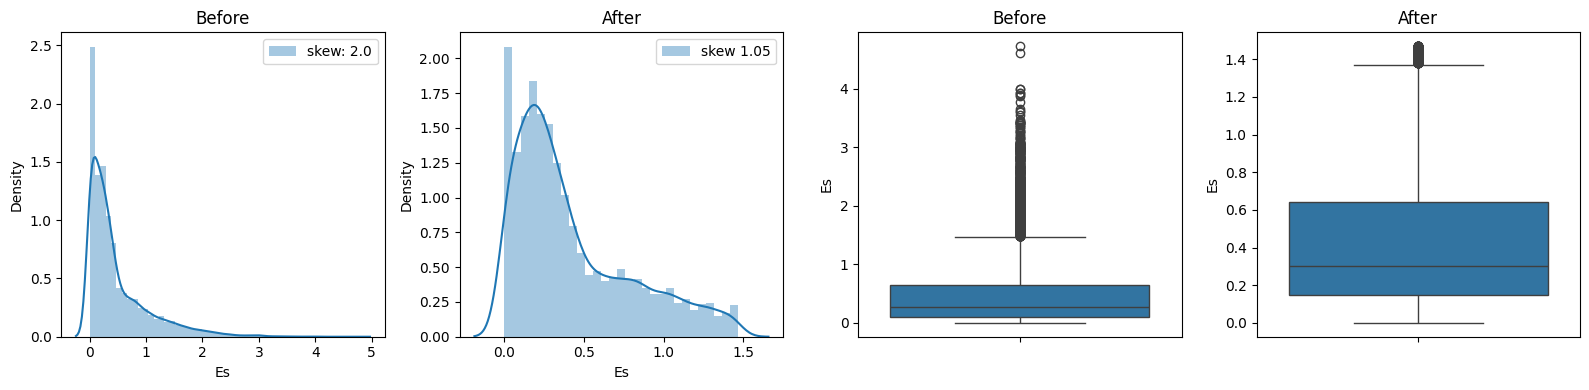

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

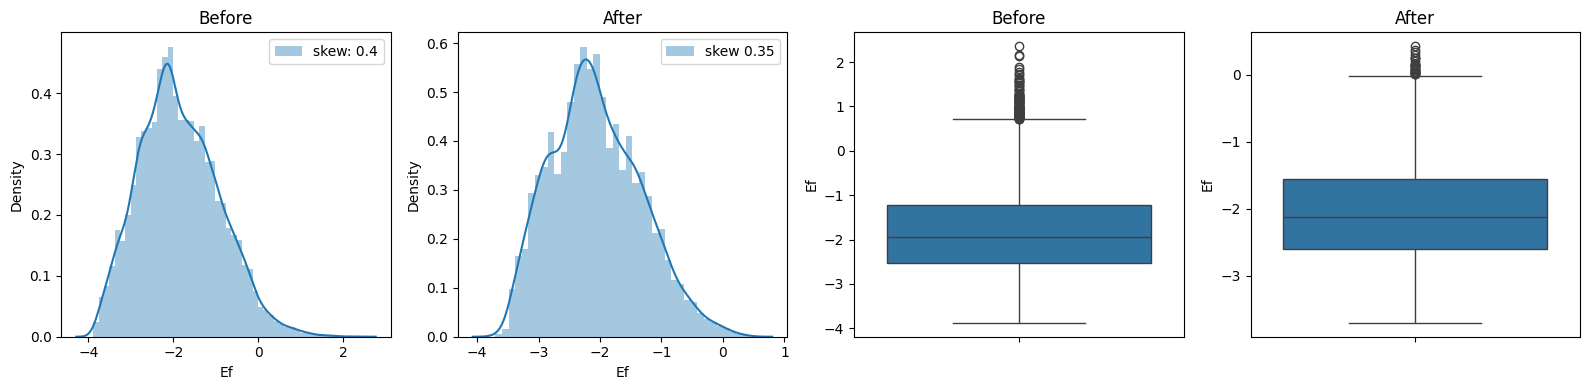

<ipython-input-18-7b2c47f17e6c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
<ipython-input-18-7b2c47f17e6c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
/

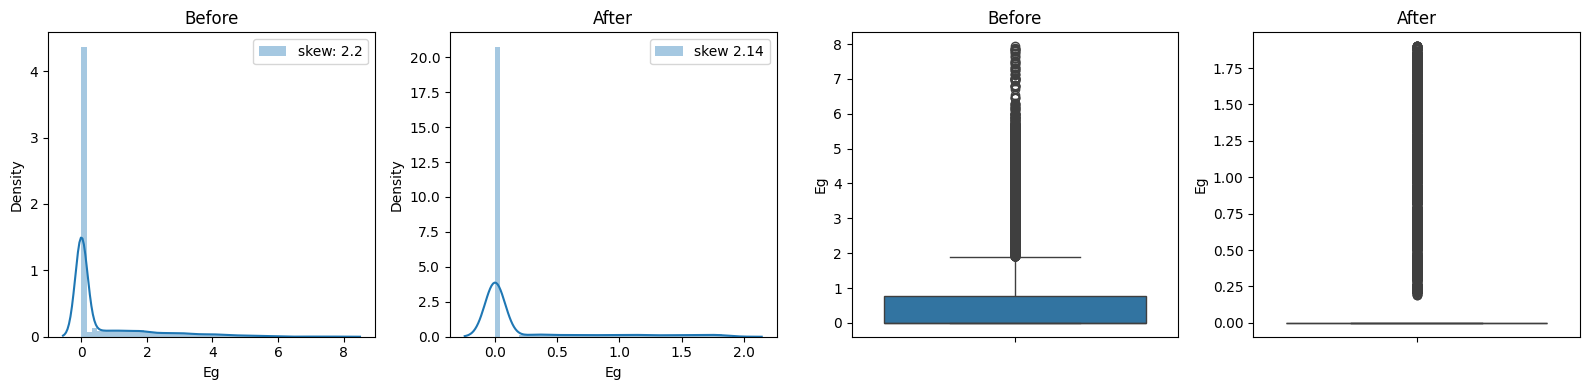

In [ ]:
for col in feature_names:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(df[col], label='skew: '+ str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.distplot(df_cleaned[col], label ='skew '+ str(np.round(df_cleaned[col].skew(),2)))
    plt.title('After')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(df_cleaned[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [ ]:
df_Ef = df_cleaned.copy()
df_Eg = df_cleaned.copy()

# Feature Selection for target as Formation Energy(Ef)

# Constant and Quasi-Constant Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
X1 = df_Ef.drop(columns=['Ef'])  # Features
y = df_Ef['Ef']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)


In [ ]:
# Constant and Quasi-Constant Feature Selection
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
# Get a boolean array indicating which features are kept
support = var_thres.get_support()

In [ ]:
# Get a list of constant columns
constant_columns = [column for column in X_train.columns if column not in X_train.columns[support]]

In [ ]:
# Print the number of constant columns
print("Number of constant columns:", len(constant_columns))

# Print the constant columns as a list
print("Constant columns:", constant_columns)

Number of constant columns: 0
Constant columns: []


# Find Corealted Pairs

In [ ]:
corr_matrix = X_train.corr()
columns = corr_matrix.columns

In [ ]:
# Create a list to keep track of correlated feature pairs
correlated_pairs = []

In [ ]:
# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame and check for high correlation
        if abs(corr_matrix.loc[columns[i], columns[j]]) > 0.95:
            correlated_pairs.append((columns[i], columns[j]))

In [ ]:

# Print the number of correlated pairs and the feature pairs themselves
print("Number of correlated pairs:", len(correlated_pairs))
print("Correlated pairs:", correlated_pairs)

Number of correlated pairs: 19
Correlated pairs: [('z_mean', 'atom_mass_mean'), ('z_std', 'atom_mass_std'), ('row_mean', 'row_std'), ('pet_mn_mean', 'pet_mn_std'), ('iupac_mean', 'iupac_std'), ('atom_rad_mean', 'atom_rad_std'), ('cal_atom_rad_mean', 'cal_atom_rad_std'), ('cov_rad_mean', 'cov_rad_std'), ('cov_rad_mean', 'p_mean'), ('cov_rad_std', 'p_mean'), ('x_mean', 'x_std'), ('ie_mean', 'ie_std'), ('p_mean', 'p_std'), ('rsp_mean', 'av_rsp_mean'), ('rsp_std', 'av_rsp_std'), ('bp_mean', 'heat_vap_mean'), ('bp_std', 'heat_vap_std'), ('k_mean', 'k_std'), ('heat_vap_mean', 'heat_vap_std')]


# Drop Correlated Pairs

In [ ]:
columns_to_drop = []

In [ ]:
# Loop over the columns to identify correlated columns for removal
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if abs(corr_matrix.loc[columns[i], columns[j]]) > 0.95:
            columns_to_drop.append(columns[j])

In [ ]:
# Print the number of columns to drop and the columns themselves
print("Number of columns to drop:", len(columns_to_drop))
print("Columns to drop:", columns_to_drop)


Number of columns to drop: 19
Columns to drop: ['atom_mass_mean', 'atom_mass_std', 'row_std', 'pet_mn_std', 'iupac_std', 'atom_rad_std', 'cal_atom_rad_std', 'cov_rad_std', 'p_mean', 'p_mean', 'x_std', 'ie_std', 'p_std', 'av_rsp_mean', 'av_rsp_std', 'heat_vap_mean', 'heat_vap_std', 'k_std', 'heat_vap_std']


In [ ]:
# Remove correlated columns from training data
X_train_filtered = X_train.drop(columns=columns_to_drop)
X_test_filtered = X_test.drop(columns=columns_to_drop)

# ANOVA Test

In [ ]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [ ]:
# SelectKBest to perform ANOVA Test (f_regression)
# Select the top 5 features
sel = SelectKBest(f_regression, k=5).fit(X_train_filtered, y_train)


In [ ]:
# Display selected feature names
selected_features = X_train_filtered.columns[sel.get_support()]


In [ ]:
# Print the selected features
print("Selected features:", selected_features)

Selected features: Index(['pet_mn_mean', 'mn_mean', 'cov_rad_mean', 'vdw_mean', 'x_mean'], dtype='object')


In [ ]:
# Subset the training and test dataframes with the selected features
X_train_selected = X_train_filtered[selected_features]
X_test_selected = X_test_filtered[selected_features]


In [ ]:
# Display the first few rows of the new training dataframe
X_train_selected.head()

pet_mn_mean  mn_mean  cov_rad_mean  vdw_mean  x_mean
9455          87.4     76.4          0.97      1.80    2.75
10599         80.0     69.0          1.07      1.84    2.75
5267          77.2     69.0          1.08      1.97    2.76
3901          91.8     81.8          0.92      1.80    2.86
3742          78.8     65.8          1.10      1.98    2.67

# Pearson Correlation

In [ ]:
# Calculate the Pearson correlation matrix for the selected features in the training set
pearson_corr_matrix = X_train_selected.corr()

In [ ]:
# Round the Pearson correlation coefficients to 2 decimal places
pearson_corr_matrix_rounded = np.round(pearson_corr_matrix, 2)


In [ ]:
# Print the rounded Pearson correlation matrix
print("Pearson Correlation Matrix (rounded to 2 decimal places):")
print(pearson_corr_matrix_rounded)

Pearson Correlation Matrix (rounded to 2 decimal places):
              pet_mn_mean  mn_mean  cov_rad_mean  vdw_mean  x_mean
pet_mn_mean          1.00     0.92         -0.84     -0.70    0.83
mn_mean              0.92     1.00         -0.86     -0.65    0.82
cov_rad_mean        -0.84    -0.86          1.00      0.73   -0.80
vdw_mean            -0.70    -0.65          0.73      1.00   -0.57
x_mean               0.83     0.82         -0.80     -0.57    1.00


# Model Training


Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# 1. Model training
model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

In [ ]:
# 2. Predictions on train and test set
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

In [ ]:
# 3. Regression Metrics for train and test sets
def print_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Print the metrics for the given set (train or test)
    print(f'{set_name} Metrics:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R^2 Score: {r2}')
    print('-' * 40)


In [ ]:
# Call the function to print metrics for both train and test sets
print_metrics(y_train, y_train_pred, 'Train')  # Train metrics
print_metrics(y_test, y_test_pred, 'Test')    # Test metrics



Train Metrics:
Mean Squared Error (MSE): 0.23077730173372463
Root Mean Squared Error (RMSE): 0.4803928618679972
Mean Absolute Error (MAE): 0.3817879998822179
R^2 Score: 0.5635688141224735
----------------------------------------
Test Metrics:
Mean Squared Error (MSE): 0.2277065307909531
Root Mean Squared Error (RMSE): 0.47718605469036196
Mean Absolute Error (MAE): 0.379514945454642
R^2 Score: 0.5833311217772564
----------------------------------------


In [ ]:
 #4. Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R^2 scores: {cv_scores}')
print(f'Mean CV R^2 score: {np.mean(cv_scores)}')

Cross-Validation R^2 scores: [0.94222948 0.94676142 0.94088141 0.94303179 0.93820968]
Mean CV R^2 score: 0.94222275561494


In [ ]:
# 5. Accuracy score on test data
test_accuracy = r2_score(y_test, y_test_pred)
print(f'Test R^2 Accuracy: {test_accuracy}')

Test R^2 Accuracy: 0.5833311217772564


# Using Optuna

In [ ]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
!pip install cmaes

# Optimizing multiple models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
import numpy as np
import optuna
from optuna.samplers import CmaEsSampler

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    # Choose the algorithm to tune
    regressor_name = trial.suggest_categorical('regressor', ['RandomForest', 'Lasso', 'XGBoost'])

    # Set up parameters based on the chosen regressor
    if regressor_name == 'RandomForest':
        # Hyperparameters for RandomForest
        n_estimators = trial.suggest_int('rf_n_estimators', 50, 300)
        max_depth = trial.suggest_int('rf_max_depth', 2, 20)
        min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('rf_min_samples_leaf', 1, 4)
        regressor = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf
        )

    elif regressor_name == 'Lasso':
        # Hyperparameters for Lasso Regression
        alpha = trial.suggest_float('lasso_alpha', 1e-3, 1e1, log=True)
        regressor = Lasso(alpha=alpha)

    elif regressor_name == 'XGBoost':
        # Hyperparameters for XGBoost
        n_estimators = trial.suggest_int('xgb_n_estimators', 50, 300)
        learning_rate = trial.suggest_float('xgb_learning_rate', 0.01, 0.3, log=True)
        max_depth = trial.suggest_int('xgb_max_depth', 2, 20)
        regressor = XGBRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth,
            objective='reg:squarederror'  # Specify the objective function
        )

    # Define the scoring metric (MAE) and accuracy (R²)
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    r2_scorer = make_scorer(r2_score)

    # Perform cross-validation for MAE (using 5-fold CV as an example)
    mae_scores = cross_val_score(regressor, X_train_selected, y_train, scoring=mae_scorer, cv=5)
    r2_scores = cross_val_score(regressor, X_train_selected, y_train, scoring=r2_scorer, cv=5)

    # Return the mean negative MAE as the objective value (convert to positive MAE by negating)
    mean_mae = -np.mean(mae_scores)

    # Store the R² score for later reference
    trial.set_user_attr("r2_score", np.mean(r2_scores))

    return mean_mae

In [ ]:
# Create the study with CMA-ES sampler
study = optuna.create_study(sampler=CmaEsSampler(), direction='minimize')  # We want to minimize MAE

[I 2024-10-03 19:47:29,512] A new study created in memory with name: no-name-8efe0fce-9577-4777-af0e-a0fc8e1850d8


In [ ]:
# Optimize the study
study.optimize(objective, n_trials=100)

[I 2024-10-03 19:47:55,398] Trial 0 finished with value: 0.3557552830808765 and parameters: {'regressor': 'XGBoost', 'xgb_n_estimators': 57, 'xgb_learning_rate': 0.013700217451924342, 'xgb_max_depth': 17}. Best is trial 0 with value: 0.3557552830808765.
[W 2024-10-03 19:47:55,414] The parameter 'regressor' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by setting `warn_independent_sampling` to `False` in the constructor of `CmaEsSampler`, if this independent sampling is intended behavior.
[W 2024-10-03 19:47:55,417] The parameter 'lasso_alpha' in trial#1 is sampled independently by using `RandomSampler` instead of `CmaEsSampler` (optimization performance may be degraded). `CmaEsSampler` does not support dynamic search space or `CategoricalDistribution`. You can suppress this warning by settin

In [ ]:
# Retrieve the best trial
best_trial = study.best_trial


In [ ]:
# Print the best trial results
print(f"Best trial MAE: {best_trial.value}")
print(f"Best R² score: {best_trial.user_attrs['r2_score']}")
print("Best hyperparameters:")
for key, value in best_trial.params.items():
    print(f"{key}: {value}")

Best trial MAE: 0.2425688215099761
Best R² score: 0.7912907213960741
Best hyperparameters:
regressor: RandomForest
rf_n_estimators: 173
rf_max_depth: 12
rf_min_samples_split: 6
rf_min_samples_leaf: 2
